In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install scikit-optimize

!pip install catboost



Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
import lightgbm as lgbm
import numpy as np
import os
import random
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#colab co pilot try1

#relatively simple ig

## Classification stuff

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [ ]:

# Describe the dataframe
print(df.describe())




In [ ]:
# Info of the dataframe
print(df.info())



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Hyperparameter grids for GridSearch
rf_params = {'n_estimators': [50, 100, 200]}
lr_params = {'fit_intercept': [True, False], 'C': [0.1, 1, 10]}
svc_params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
xgboost_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}

# Train and get predictions for RandomForestClassifier
rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# Train and get predictions for LogisticRegression
lr = GridSearchCV(LogisticRegression(), lr_params, cv=5)
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

# Train and get predictions for SupportVectorClassifier
svc = GridSearchCV(SVC(), svc_params, cv=5)
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions, average='weighted')
svc_recall = recall_score(y_test, svc_predictions, average='weighted')
svc_f1 = f1_score(y_test, svc_predictions, average='weighted')

# Train and get predictions for XGBoost
xgboost = GridSearchCV(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    xgboost_params,
    cv=5
)
xgboost.fit(X_train, y_train)
xgboost_predictions = xgboost.predict(X_test)
xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)
xgboost_precision = precision_score(y_test, xgboost_predictions, average='weighted')
xgboost_recall = recall_score(y_test, xgboost_predictions, average='weighted')
xgboost_f1 = f1_score(y_test, xgboost_predictions, average='weighted')



<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: Species
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [ ]:
# Print out the results
print(f"Random Forest accuracy: {rf_accuracy:.2f}")
print(f"Random Forest precision: {rf_precision:.2f}")
print(f"Random Forest recall: {rf_recall:.2f}")
print(f"Random Forest F1 score: {rf_f1:.2f}")
print(f"Random Forest best params: {rf.best_params_}\n")

print(f"Logistic Regression accuracy: {lr_accuracy:.2f}")
print(f"Logistic Regression precision: {lr_precision:.2f}")
print(f"Logistic Regression recall: {lr_recall:.2f}")
print(f"Logistic Regression F1 score: {lr_f1:.2f}")
print(f"Logistic Regression best params: {lr.best_params_}\n")

print(f"Support Vector Classifier accuracy: {svc_accuracy:.2f}")
print(f"Support Vector Classifier precision: {svc_precision:.2f}")
print(f"Support Vector Classifier recall: {svc_recall:.2f}")
print(f"Support Vector Classifier F1 score: {svc_f1:.2f}")
print(f"Support Vector Classifier best params: {svc.best_params_}\n")

print(f"XGBoost accuracy: {xgboost_accuracy:.2f}")
print(f"XGBoost precision: {xgboost_precision:.2f}")
print(f"XGBoost recall: {xgboost_recall:.2f}")
print(f"XGBoost F1 score: {xgboost_f1:.2f}")
print(f"XGBoost best params: {xgboost.best_params_}")


Random Forest accuracy: 1.00
Random Forest precision: 1.00
Random Forest recall: 1.00
Random Forest F1 score: 1.00
Random Forest best params: {'n_estimators': 200}

Logistic Regression accuracy: 1.00
Logistic Regression precision: 1.00
Logistic Regression recall: 1.00
Logistic Regression F1 score: 1.00
Logistic Regression best params: {'C': 1, 'fit_intercept': True}

Support Vector Classifier accuracy: 1.00
Support Vector Classifier precision: 1.00
Support Vector Classifier recall: 1.00
Support Vector Classifier F1 score: 1.00
Support Vector Classifier best params: {'C': 1, 'gamma': 'scale'}

XGBoost accuracy: 1.00
XGBoost precision: 1.00
XGBoost recall: 1.00
XGBoost F1 score: 1.00
XGBoost best params: {'learning_rate': 0.01, 'n_estimators': 100}


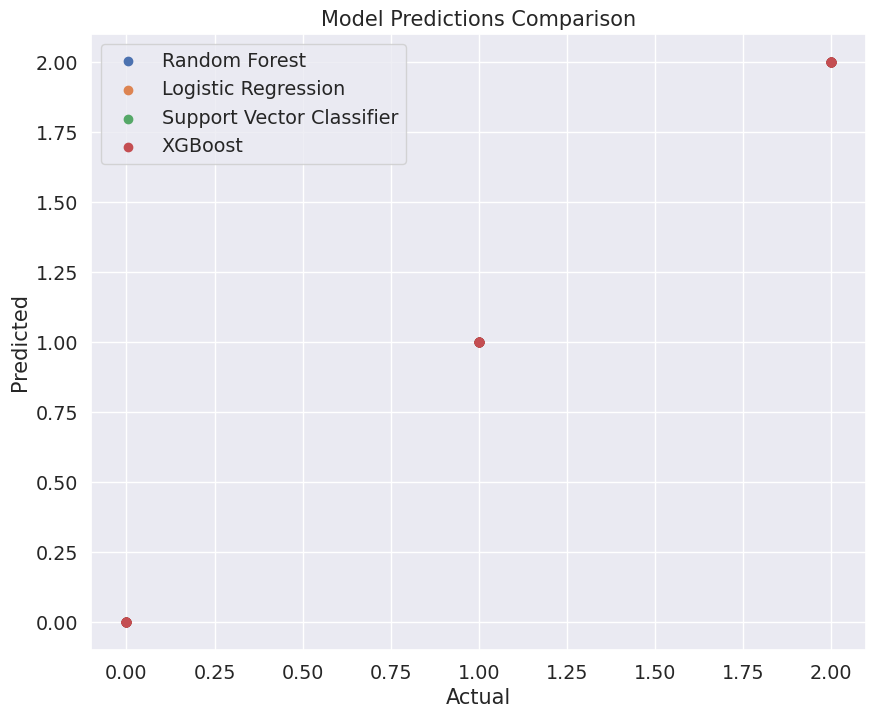

In [ ]:
import matplotlib.pyplot as plt

# Create a single figure to hold all scatter plots
plt.figure(figsize=(10, 8))

# Plot RandomForestClassifier predictions
plt.scatter(y_test, rf_predictions, label="Random Forest")
# Plot LogisticRegression predictions
plt.scatter(y_test, lr_predictions, label="Logistic Regression")
# Plot SupportVectorClassifier predictions
plt.scatter(y_test, svc_predictions, label="Support Vector Classifier")
# Plot XGBoost predictions
plt.scatter(y_test, xgboost_predictions, label="XGBoost")

# Set plot labels and title
plt.title("Model Predictions Comparison")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Add a legend
plt.legend()

# Display the plot
plt.show()



##Regression examples


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:


california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Describe the dataframe
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:

# Rename column
df = df.rename(columns={'MedHouseVal': 'MedianHouseValue'})
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:


# correlation matrix
df_train = df.copy()
corrmat = df.corr()
k = 7  # number of variables for heatmap
cols = corrmat.nlargest(k, corrmat.columns[0])[corrmat.columns[0]].index

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(12, 10))  # Increase figsize here
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


NameError: ignored

In [ ]:
sns.pairplot(df, size=3)

Output hidden; open in https://colab.research.google.com to view.

Models #1/REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Hyperparameter grid for GridSearch
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomForestRegressor
rf = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf.fit(X_train, y_train)

best_params = rf.best_params_
best_model = rf.best_estimator_
best_predictions = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_predictions)
best_rmse = np.sqrt(best_mse)
best_r2 = r2_score(y_test, best_predictions)

print(f"Random Forest Best params: {best_params}")
print(f"Random Forest MSE with best params: {best_mse:.2f}")
print(f"Random Forest RMSE with best params: {best_rmse:.2f}")
print(f"R^2 Score: {best_r2:.2f}")
plt.figure(figsize=(15,10))
plt.scatter(y_test, best_predictions, color='blue', label='Random Forest')
plt.scatter(y_test, y_test, color='black', label='Actual')

plt.legend()
plt.show()


Linear Regression Best params: {'fit_intercept': True}
Linear Regression MSE with best params: 0.56
R^2 Score: 0.58


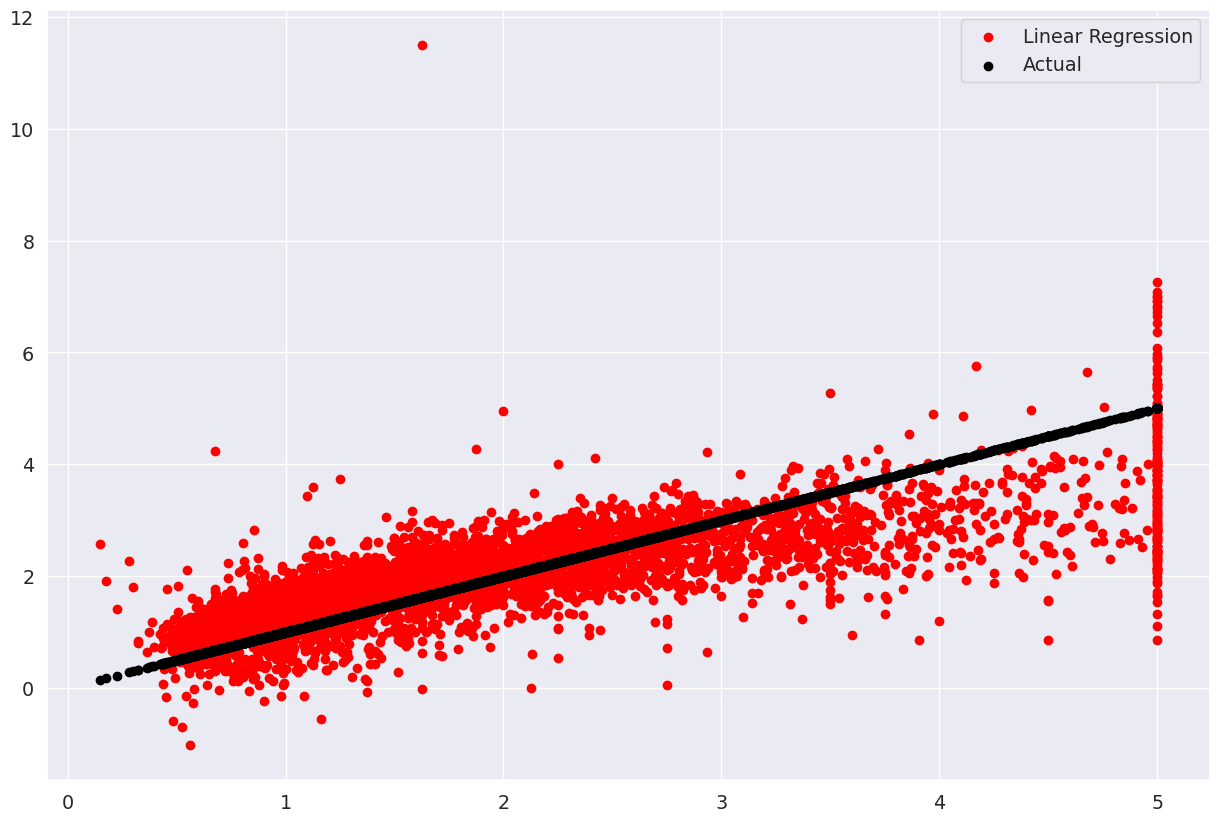

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Hyperparameter grid for GridSearch
lr_params = {'fit_intercept': [True, False]}

# LinearRegression
lr = GridSearchCV(LinearRegression(), lr_params, cv=5)
lr.fit(X_train, y_train)

best_params = lr.best_params_
best_model = lr.best_estimator_
lr_predictions = best_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression Best params: {best_params}")
print(f"Linear Regression MSE with best params: {lr_mse:.2f}")
print(f"R^2 Score: {lr_r2:.2f}")
plt.figure(figsize=(15,10))
plt.scatter(y_test, lr_predictions, color='red', label='Linear Regression')
plt.scatter(y_test, y_test, color='black', label='Actual')

plt.legend()
plt.show()


Support Vector Regressor Best params: {'C': 10, 'gamma': 'scale'}
Support Vector Regressor MSE with best params: 0.32
Support Vector Regressor R^2 Score with best params: 0.75


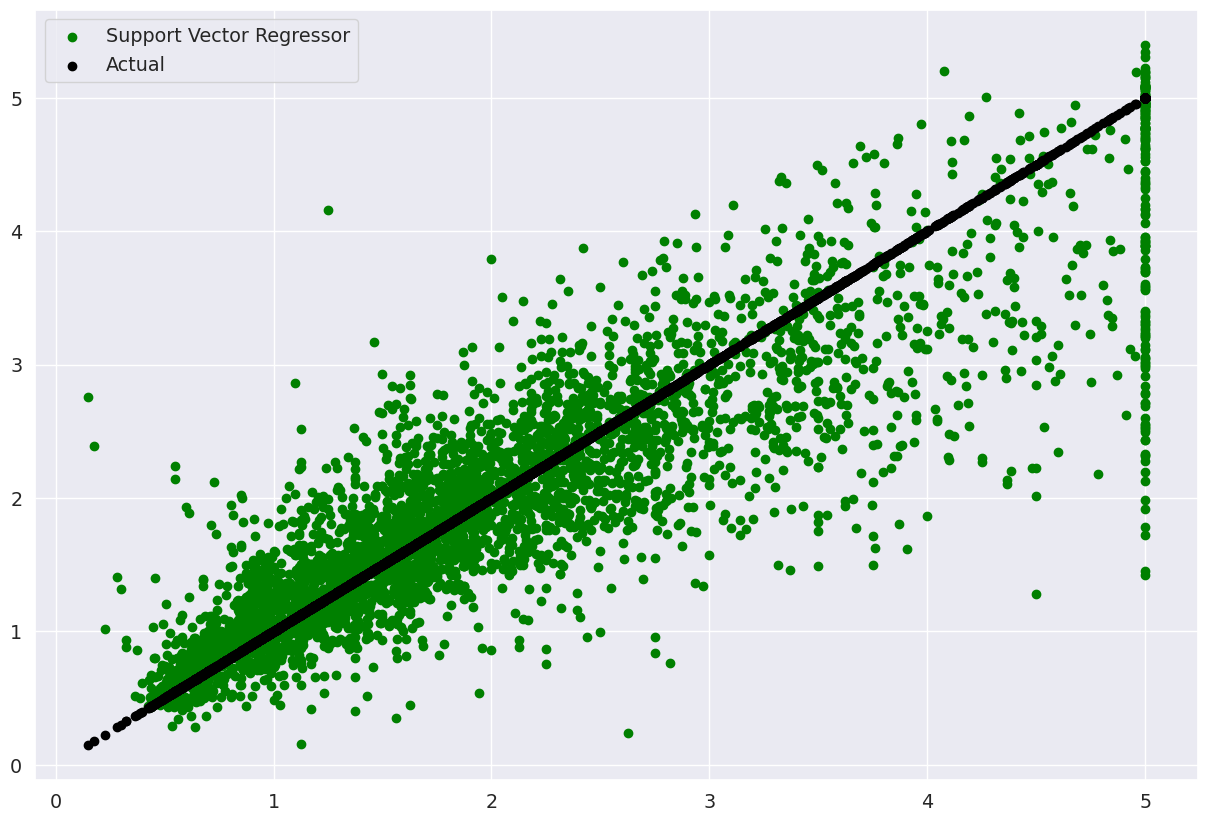

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Hyperparameter grid for GridSearch
svc_params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}

# SupportVectorRegressor
svc = GridSearchCV(SVR(), svc_params, cv=5)
svc.fit(X_train, y_train)

best_params = svc.best_params_
best_model = svc.best_estimator_
svc_predictions = best_model.predict(X_test)
svc_mse = mean_squared_error(y_test, svc_predictions)
svc_r2 = r2_score(y_test, svc_predictions)

print(f"Support Vector Regressor Best params: {best_params}")
print(f"Support Vector Regressor MSE with best params: {svc_mse:.2f}")
print(f"Support Vector Regressor R^2 Score with best params: {svc_r2:.2f}")
plt.figure(figsize=(15,10))
plt.scatter(y_test, lr_predictions, color='red', label='Linear Regression')
plt.scatter(y_test, svc_predictions, color='green', label='Support Vector Regressor')
plt.scatter(y_test, y_test, color='black', label='Actual')

plt.legend()
plt.show()




XGBoost Best params: {'learning_rate': 0.1, 'n_estimators': 200}
XGBoost MSE with best params: 0.21
XGBoost R^2 Score with best params: 0.84


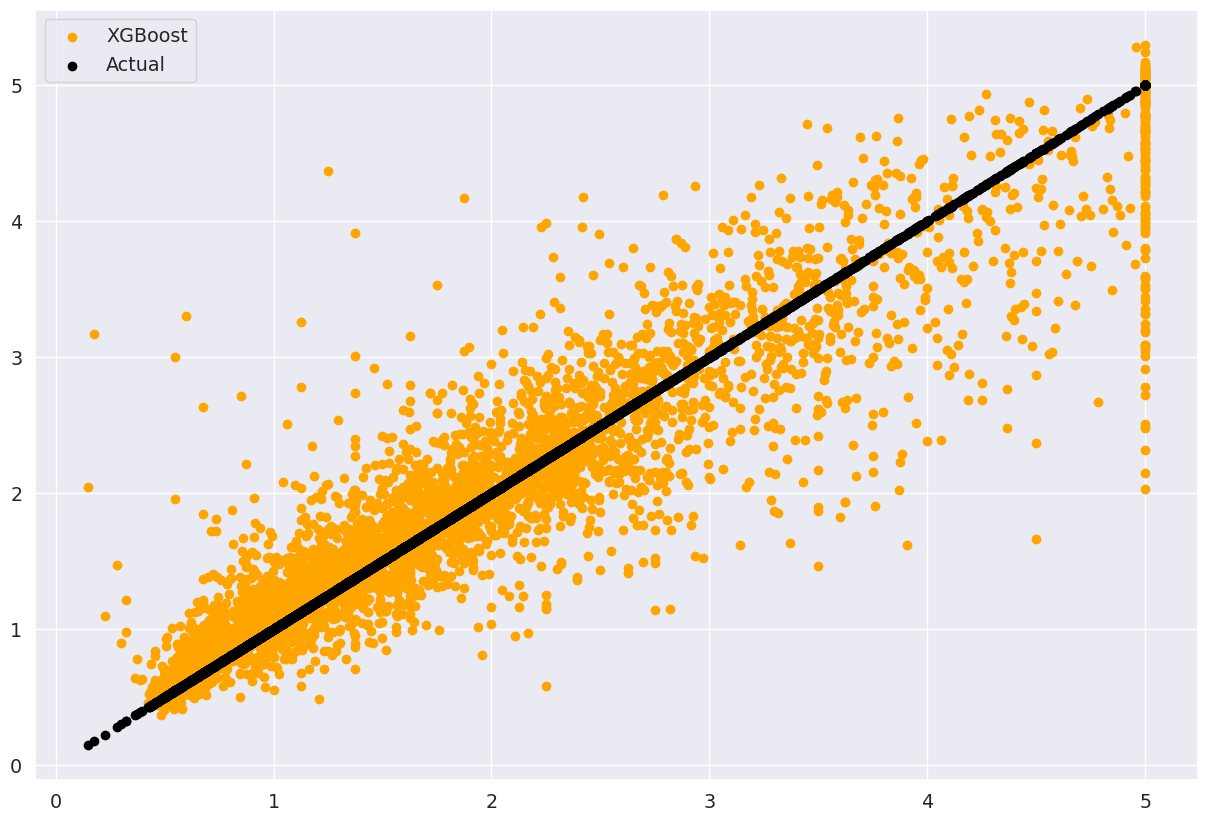

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import xgboost as xgb

# Hyperparameter grid for GridSearch
xgboost_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}

# XGBoost
xgboost = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), xgboost_params, cv=5)
xgboost.fit(X_train, y_train)

best_params = xgboost.best_params_
best_model = xgboost.best_estimator_
xgboost_predictions = best_model.predict(X_test)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
xgboost_r2 = r2_score(y_test, xgboost_predictions)

print(f"XGBoost Best params: {best_params}")
print(f"XGBoost MSE with best params: {xgboost_mse:.2f}")
print(f"XGBoost R^2 Score with best params: {xgboost_r2:.2f}")
plt.figure(figsize=(15,10))
plt.scatter(y_test, xgboost_predictions, color='orange', label='XGBoost')
plt.scatter(y_test, y_test, color='black', label='Actual')

plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(12, 10))  # Increase figsize here

plt.scatter(y_test, best_predictions, color='blue', label='Random Forest')
plt.scatter(y_test, lr_predictions, color='red', label='Linear Regression')
plt.scatter(y_test, svc_predictions, color='green', label='Support Vector Regressor')
plt.scatter(y_test, xgboost_predictions, color='orange', label='XGBoost')
plt.scatter(y_test, y_test, color='black', label='Actual')

plt.legend()
plt.show()

Models 2/Regression

In [ ]:
# Hyperparameter grids for GridSearch
rf_params = {'n_estimators': [50, 100, 200]}
lr_params = {'fit_intercept': [True, False]}
svc_params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
xgboost_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}


In [ ]:

# Train and get predictions for RandomForestRegressor
rf = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Train and get predictions for LinearRegression
lr = GridSearchCV(LinearRegression(), lr_params, cv=5)
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)

# Train and get predictions for SupportVectorRegressor
svc = GridSearchCV(SVR(), svc_params, cv=5)
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
svc_mse = mean_squared_error(y_test, svc_predictions)

# Train and get predictions for XGBoost
xgboost = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), xgboost_params, cv=5)
xgboost.fit(X_train, y_train)
xgboost_predictions = xgboost.predict(X_test)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)





In [ ]:
# Print out the results
plt.figure(figsize=(20, 10))

print(f"Random Forest MSE: {rf_mse:.2f}, Best params: {rf.best_params_}")
plt.scatter(y_test, rf_predictions, color='blue', label='Random Forest')

print(f"Linear Regression MSE: {lr_mse:.2f}, Best params: {lr.best_params_}")
plt.scatter(y_test, lr_predictions, color='red', label='Linear Regression')

print(f"Support Vector Regressor MSE: {svc_mse:.2f}, Best params: {svc.best_params_}")
plt.scatter(y_test, svc_predictions, color='green', label='Support Vector Regressor')

print(f"XGBoost MSE: {xgboost_mse:.2f}, Best params: {xgboost.best_params_}")
plt.scatter(y_test, xgboost_predictions, color='orange', label='XGBoost')

plt.scatter(y_test, y_test, color='black', label='Actual')  # Scatter plot for y_test

plt.legend()  # Show a legend with the labels for each plot
plt.show()  # Display all the plots


models #3/Regression


# plots


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target



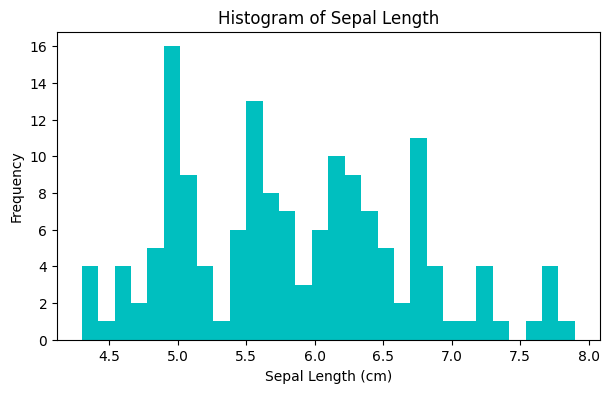

In [ ]:
# Histogram
plt.figure(figsize=(7,4))
plt.hist(df['sepal length (cm)'], bins=30, color='c')
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


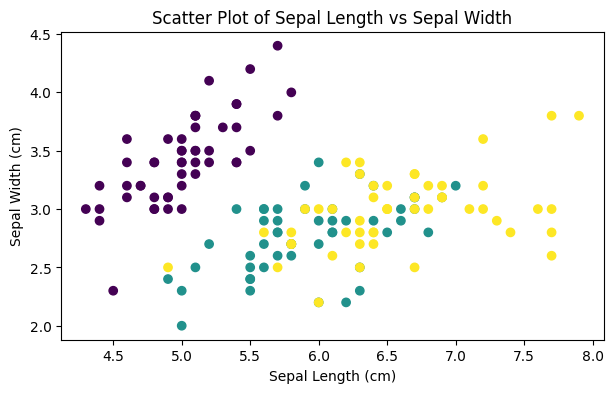

In [ ]:

# Scatter plot
plt.figure(figsize=(7,4))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['species'])
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


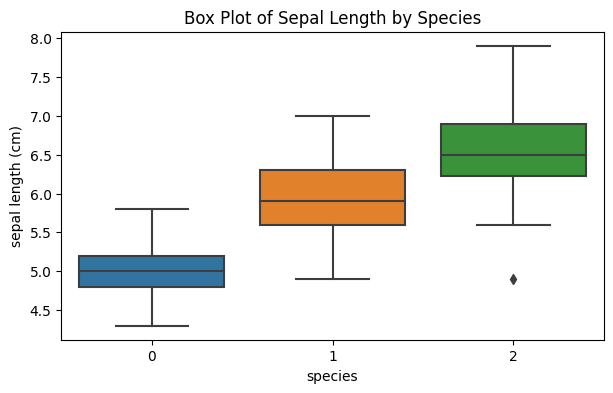

In [ ]:

# Box plot
plt.figure(figsize=(7,4))
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Box Plot of Sepal Length by Species')
plt.show()



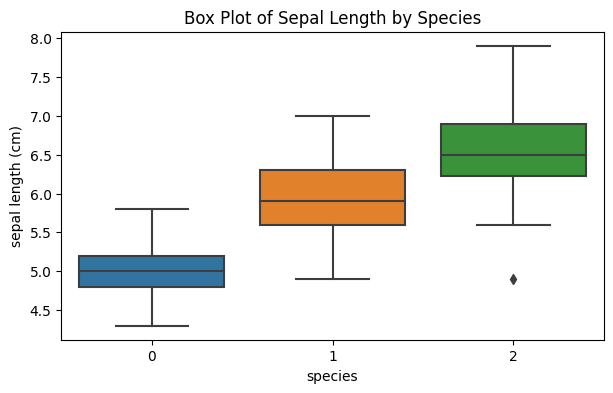

In [ ]:

# Box plot
plt.figure(figsize=(7,4))
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Box Plot of Sepal Length by Species')
plt.show()



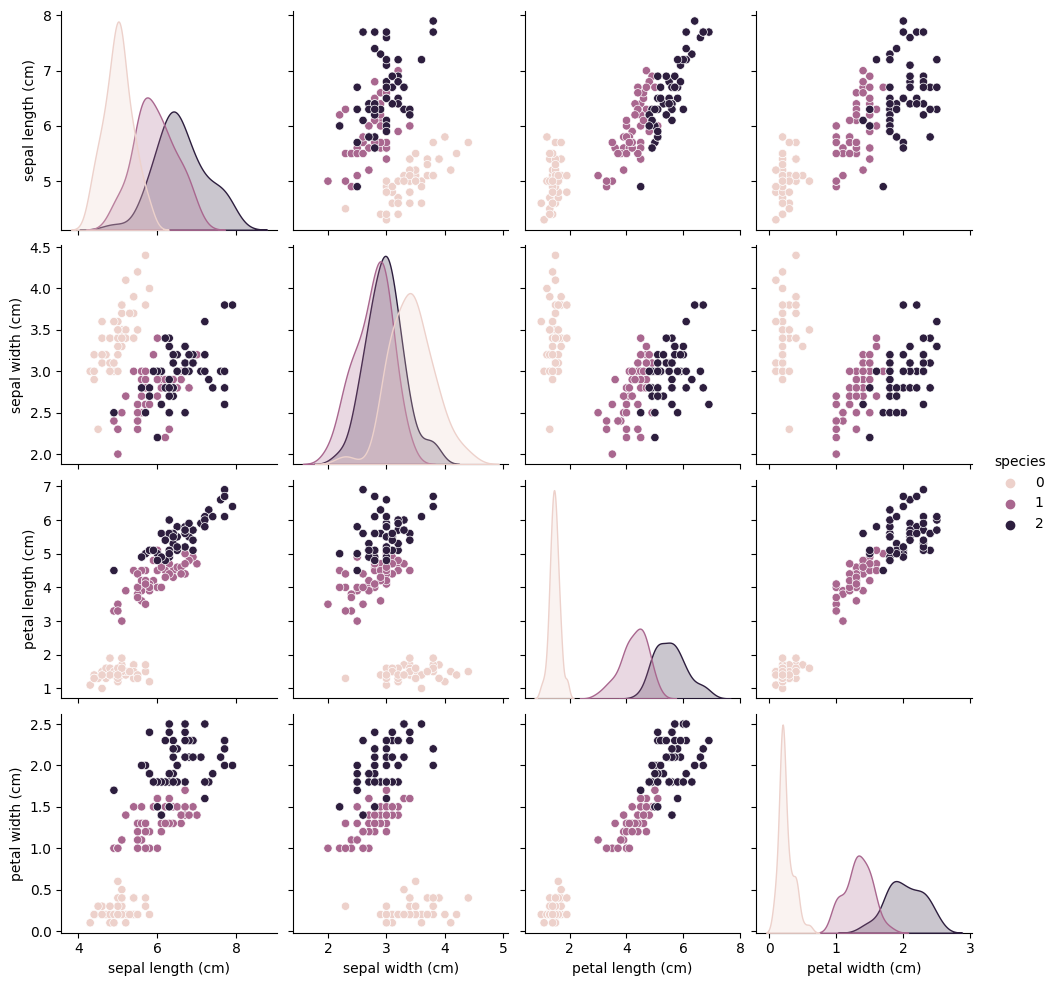

In [ ]:

# Pair plot
sns.pairplot(df, hue='species')
plt.show()



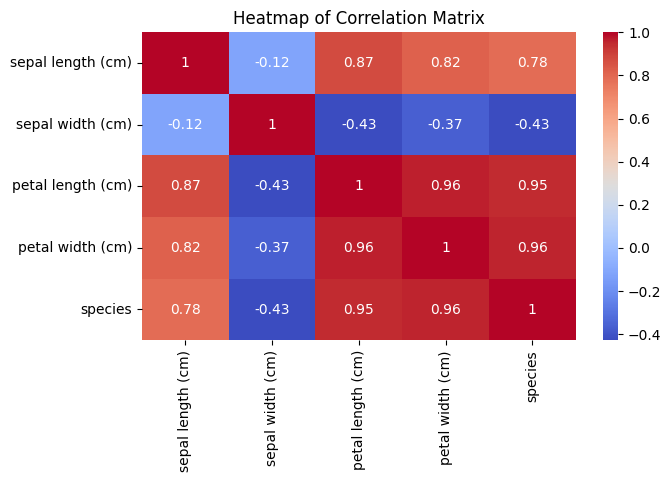

In [ ]:
# Heatmap (simple)
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()



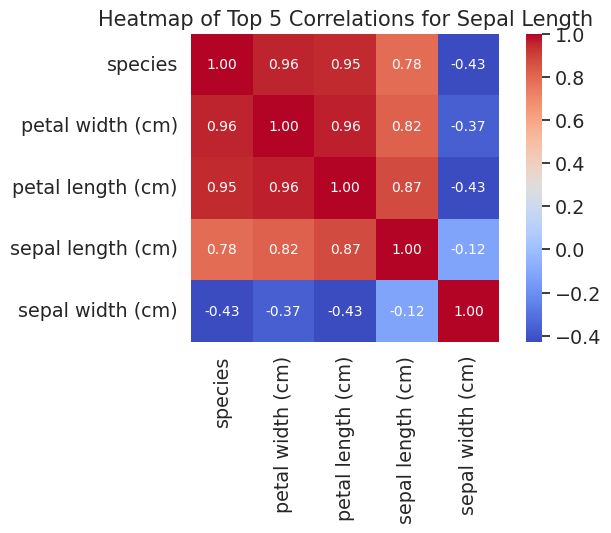

In [ ]:
# Heatmap (advanced)
corrmat = df.corr()
cols = corrmat.nlargest(5, 'species')['species'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(7,4))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values, cmap='coolwarm')
plt.title('Heatmap of Top 5 Correlations for Sepal Length')
plt.show()
# lmplot: This function creates a linear model plot. It creates a scatter plot with a linear fit on top of it.
sns.lmplot(x="total_bill", y="tip", data=tips)
plt.show()


# regplot: This function plots data and a linear regression model fit.
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()
# pairplot: It's a matrix of scatterplots. They can be used to visualize the relationships between variables in a dataset.
sns.pairplot(tips)
plt.show()
# jointplot: Joint plot is used to draw a plot of two variables with bivariate and univariate graphs.
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()



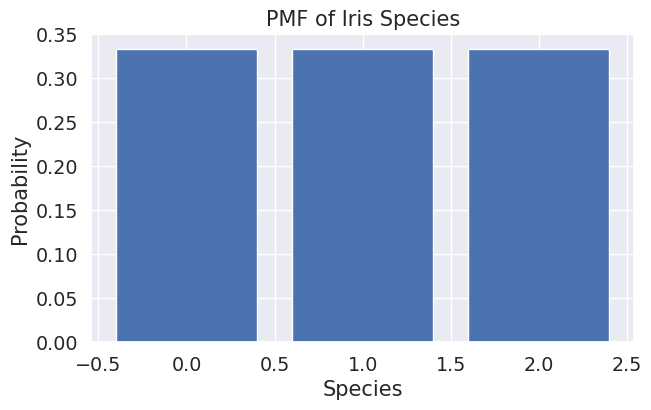

In [ ]:
# Probability Mass Function (PMF)
values, counts = np.unique(iris.target, return_counts=True)
pmf = counts / len(iris.target)
plt.figure(figsize=(7,4))
plt.bar(values, pmf)
plt.title('PMF of Iris Species')
plt.xlabel('Species')
plt.ylabel('Probability')
plt.show()



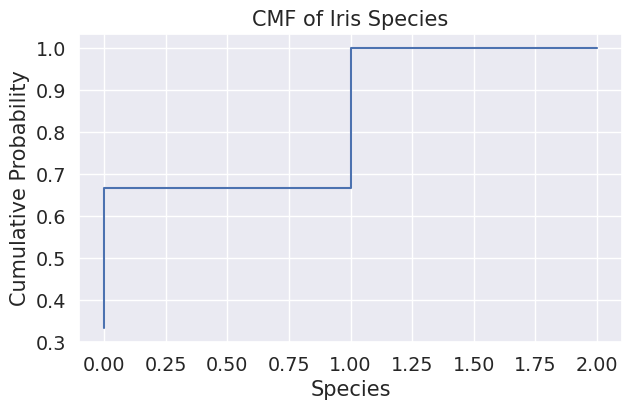

In [ ]:
# Cumulative Mass Function (CMF)
cmf = np.cumsum(pmf)
plt.figure(figsize=(7,4))
plt.step(values, cmf)
plt.title('CMF of Iris Species')
plt.xlabel('Species')
plt.ylabel('Cumulative Probability')
plt.show()

### more plots


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the example tips dataset
tips = sns.load_dataset("tips")


<ipython-input-1-b7947c3d3017>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


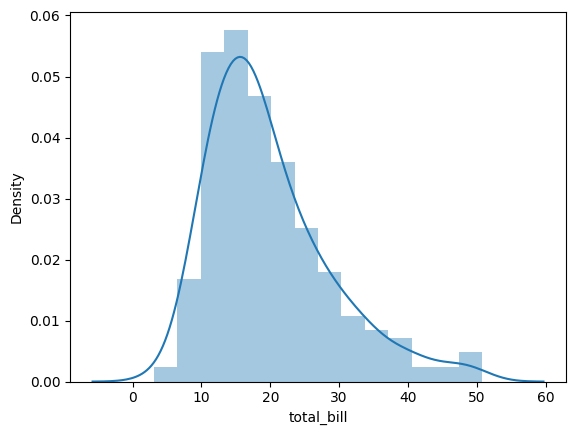

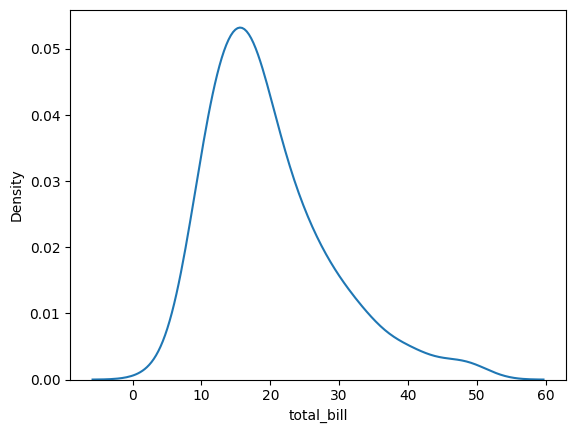

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the example tips dataset
tips = sns.load_dataset("tips")

sns.distplot(tips['total_bill'])
plt.show()

# kdeplot: This function fits and plots a one-dimensional or two-dimensional kernel density estimate.
sns.kdeplot(tips['total_bill'])
plt.show()


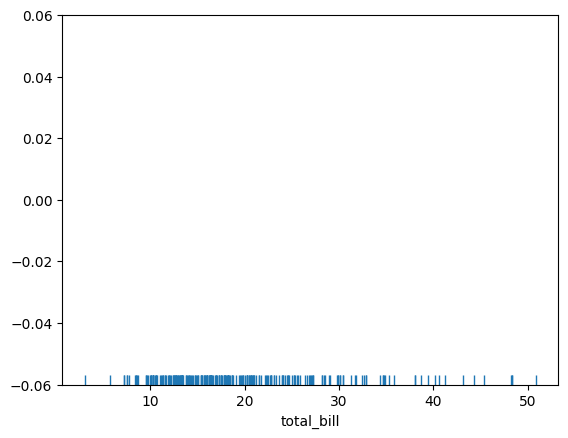

In [ ]:

# rugplot: This function draws a dash mark for each point on a univariate distribution.
sns.rugplot(tips['total_bill'])
plt.show()


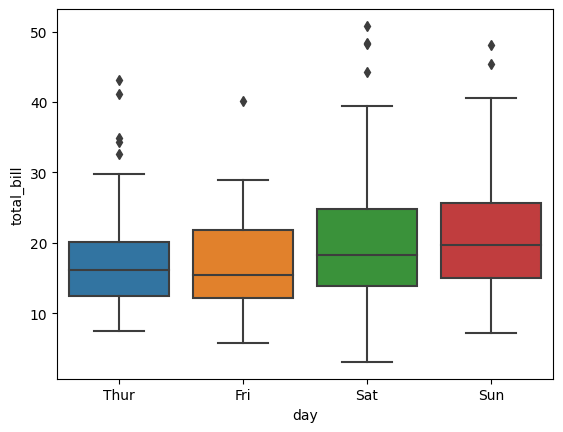

In [ ]:

# boxplot: A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()


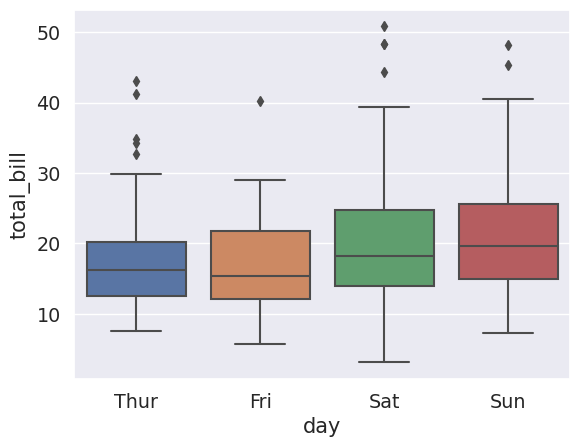

In [ ]:

# boxplot: A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()



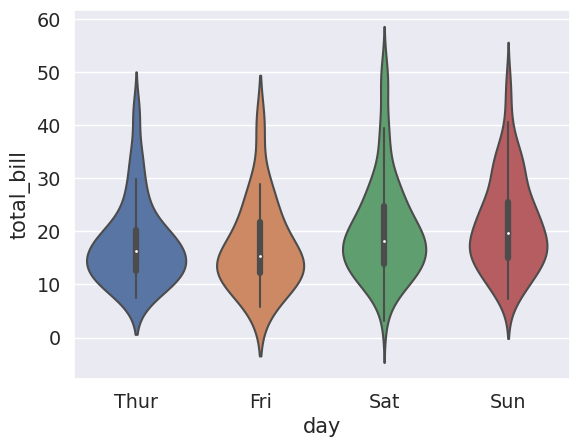

In [ ]:
# violinplot: A violin plot plays a similar role as a box and whisker plot.
sns.violinplot(x="day", y="total_bill", data=tips)
plt.show()


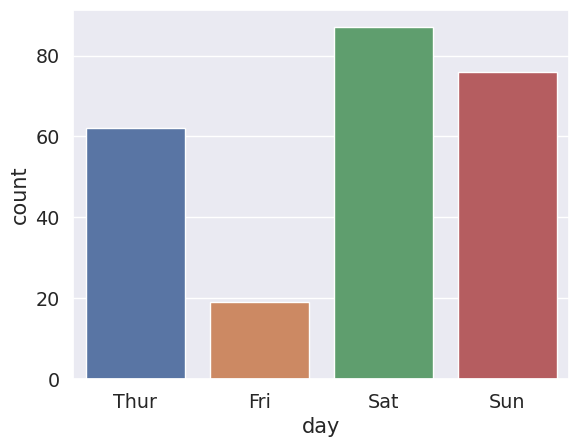

In [ ]:

# countplot: This function shows the counts of observations in each categorical bin.
sns.countplot(x="day", data=tips)
plt.show()



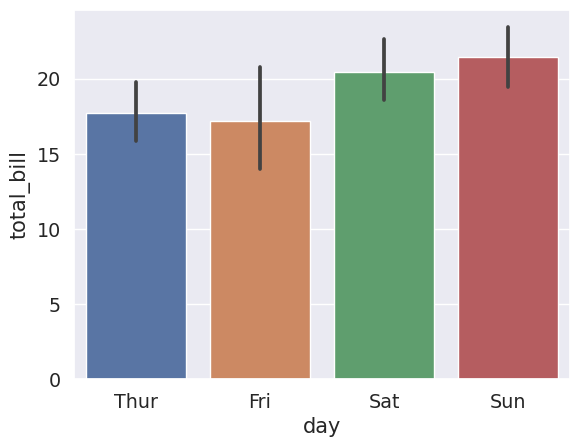

In [ ]:
# barplot: This function shows point estimates and confidence intervals as rectangular bars.
sns.barplot(x="day", y="total_bill", data=tips)
plt.show()



<ipython-input-22-c320737d2d24>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = tips.corr()


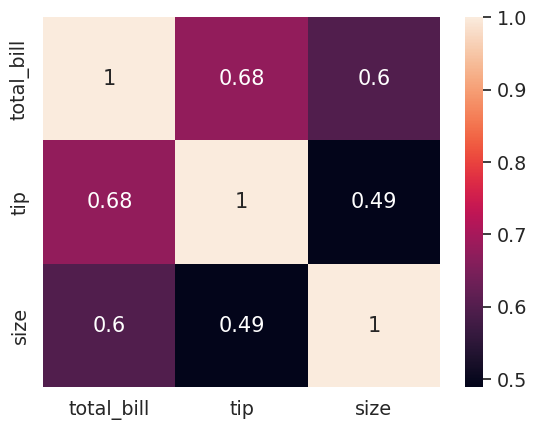

In [ ]:
# heatmap: A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.
# Compute the correlation matrix
corr = tips.corr()
# Draw the heatmap
sns.heatmap(corr, annot=True)
plt.show()



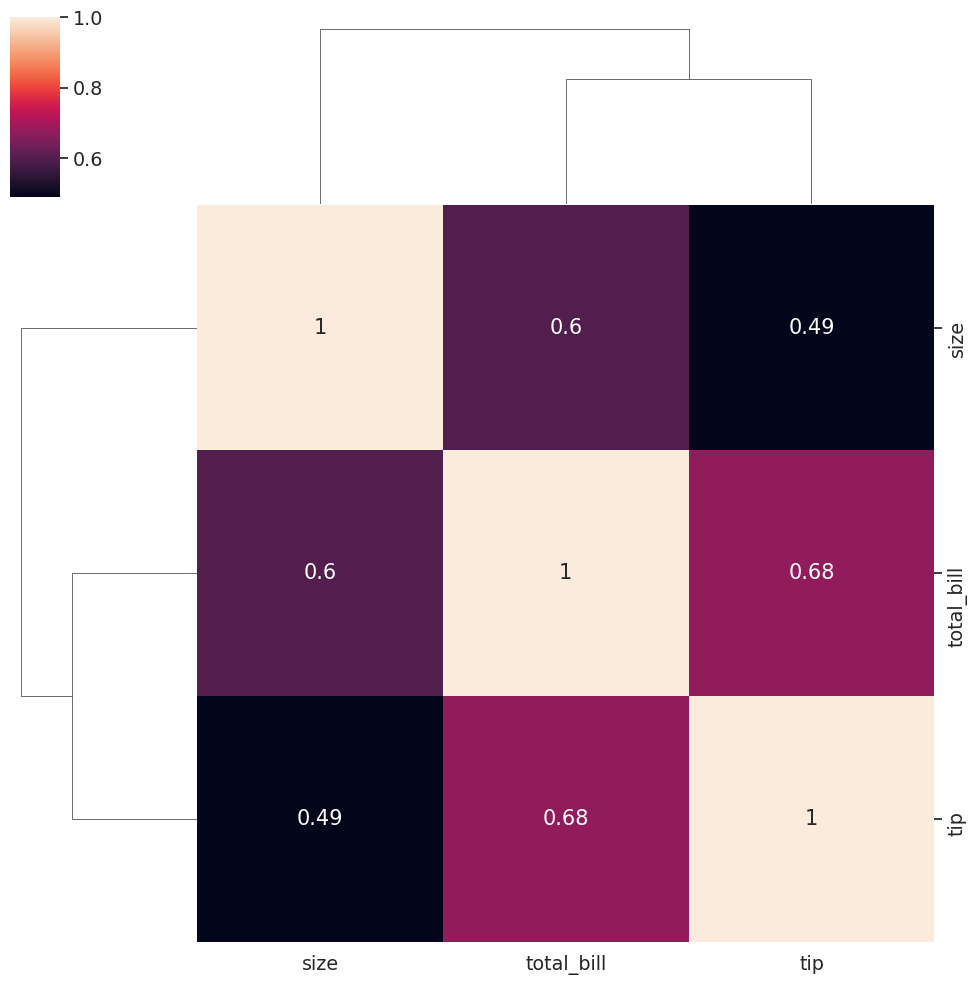

In [ ]:
# clustermap: The clustermap uses hierarchal clustering to produce a clustered version of the heatmap.
sns.clustermap(corr, annot=True)
plt.show()



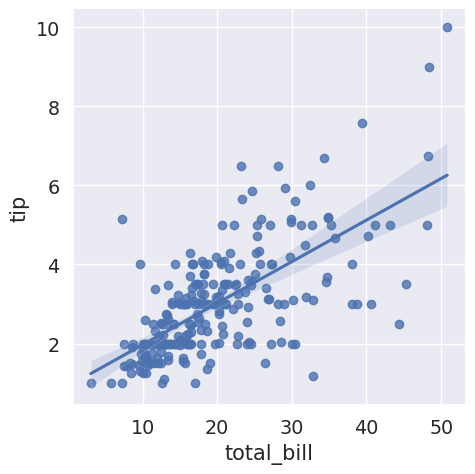

In [ ]:
# lmplot: This function creates a linear model plot. It creates a scatter plot with a linear fit on top of it.
sns.lmplot(x="total_bill", y="tip", data=tips)
plt.show()


# regplot: This function plots data and a linear regression model fit.
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()
# pairplot: It's a matrix of scatterplots. They can be used to visualize the relationships between variables in a dataset.
sns.pairplot(tips)
plt.show()
# jointplot: Joint plot is used to draw a plot of two variables with bivariate and univariate graphs.
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()


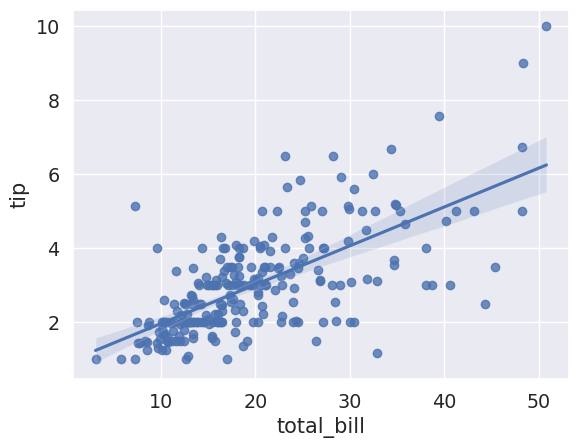

In [ ]:
# regplot: This function plots data and a linear regression model fit.
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()
# pairplot: It's a matrix of scatterplots. They can be used to visualize the relationships between variables in a dataset.
sns.pairplot(tips)
plt.show()
# jointplot: Joint plot is used to draw a plot of two variables with bivariate and univariate graphs.
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()



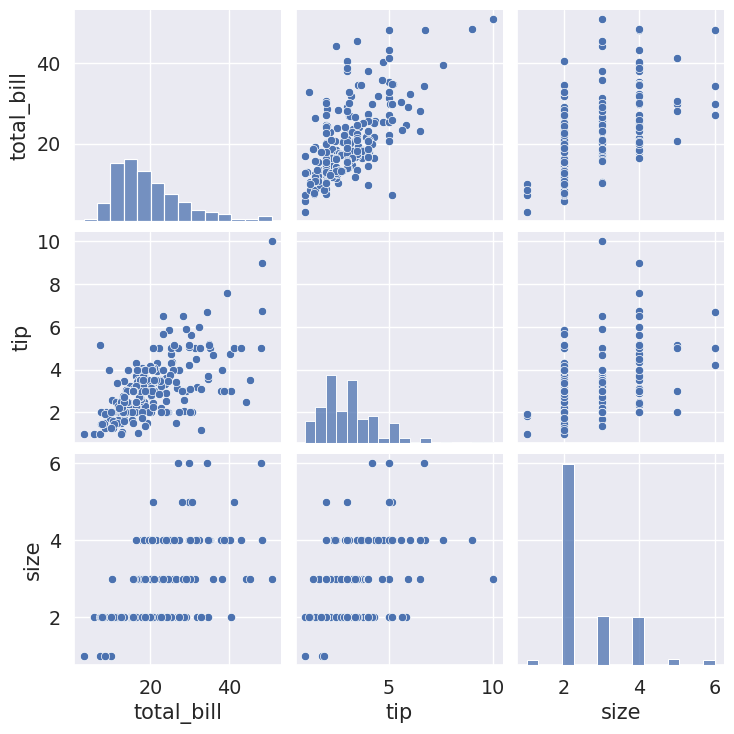

In [ ]:
# pairplot: It's a matrix of scatterplots. They can be used to visualize the relationships between variables in a dataset.
sns.pairplot(tips)
plt.show()
# jointplot: Joint plot is used to draw a plot of two variables with bivariate and univariate graphs.
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()


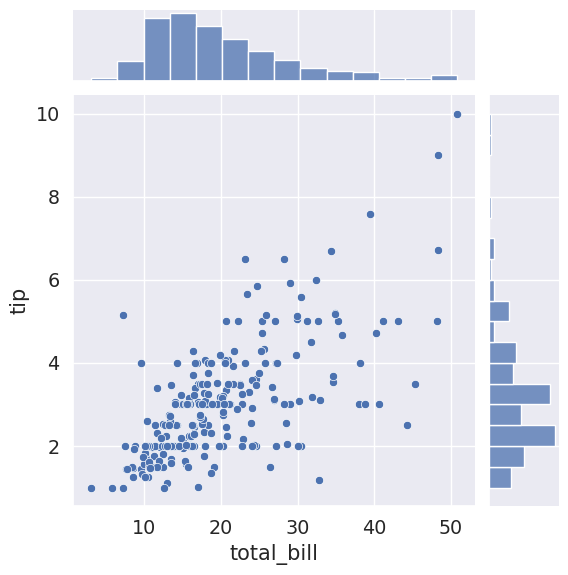

In [ ]:
# jointplot: Joint plot is used to draw a plot of two variables with bivariate and univariate graphs.
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

#features stuff

##features n1/ catboost fearures

In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer
from itertools import combinations

pd.set_option('display.max_columns', None)
folder_path = '/content/drive/MyDrive/house/'
dfOriginal  = pd.read_csv(folder_path + 'train.csv')

dfOriginal.info()

dfTest= pd.read_csv(folder_path + 'test.csv')

dfTrain = dfOriginal.copy().drop(['Id'], axis=1)
dfTest = dfTest.drop(['Id'], axis=1)

NUM_TOP_FEATURES = 30  # Specify the number of top features here
NUM_TOP_COMBINED_FEATURES = 30  # Specify the number of top combined features here

def combineFeatures(df, features_to_combine):
    existing_cols = set(df.columns)
    comb_features = [features_to_combine[n:n+2] for n in range(0, len(features_to_combine), 2)]
    for i, feature_group in enumerate(comb_features):
        interaction_col = "_and_".join(feature_group)
        if interaction_col not in existing_cols:
            df[interaction_col] = df[feature_group].mean(axis=1, skipna=True)
            existing_cols.add(interaction_col)
    return df

def transformData(dfTrain, dfTest):
    salePrice = dfTrain.pop('SalePrice')

    imp_categorical = SimpleImputer(strategy="constant", fill_value='Missing')
    imp_numerical = SimpleImputer(strategy="mean")

    for col in dfTrain.columns:
        if dfTrain[col].dtype == object:
            dfTrain[col] = imp_categorical.fit_transform(dfTrain[[col]])
            dfTest[col] = imp_categorical.transform(dfTest[[col]])
        else:
            dfTrain[col] = imp_numerical.fit_transform(dfTrain[[col]])
            dfTest[col] = imp_numerical.transform(dfTest[[col]])

    cat_indices = np.where(dfTrain.dtypes != np.float)[0]
    cat = CatBoostRegressor(loss_function='RMSE')
    cat.fit(dfTrain, salePrice, cat_features=cat_indices)

    importances = cat.get_feature_importance()

    feature_importances = pd.DataFrame({'feature': dfTrain.columns, 'importance': importances})
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)

    top_features = feature_importances['feature'][:NUM_TOP_FEATURES].tolist()
    bottom_50_features = feature_importances['feature'][-50:].tolist()

    # combine the same features for train and test dataframes
    for dataframe in [dfTrain, dfTest]:
        dataframe = combineFeatures(dataframe, bottom_50_features)

    # Add the target variable back to dfTrain for the correlation calculation
    dfTrain['SalePrice'] = salePrice
    correlations = dfTrain.corr()['SalePrice'].drop('SalePrice')
    top_combined_features = correlations.abs().nlargest(50).index.tolist()

    final_columns = list(set(top_features + top_combined_features + ['SalePrice']))

    # Create a version of final_columns without 'SalePrice' for dfTest
    final_columns_test = [column for column in final_columns if column != 'SalePrice']

    dfTrain = dfTrain[final_columns]
    dfTest = dfTest[final_columns_test]

    return dfTrain, dfTest



dfTrain, dfTest= transformData(dfTrain,dfTest)
dfTrain.info()


In [ ]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MiscVal                        1460 non-null   float64
 1   LotFrontage                    1460 non-null   float64
 2   EnclosedPorch_and_Exterior2nd  1460 non-null   float64
 3   Fireplaces                     1460 non-null   float64
 4   LotShape                       1460 non-null   object 
 5   YearRemodAdd                   1460 non-null   float64
 6   BsmtUnfSF                      1460 non-null   float64
 7   YrSold_and_Exterior1st         1460 non-null   float64
 8   3SsnPorch                      1460 non-null   float64
 9   OverallQual                    1460 non-null   float64
 10  Neighborhood                   1460 non-null   object 
 11  GarageCars                     1460 non-null   float64
 12  MasVnrArea                     1460 non-null   f

In [ ]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MiscVal                        1459 non-null   float64
 1   LotFrontage                    1459 non-null   float64
 2   EnclosedPorch_and_Exterior2nd  1459 non-null   float64
 3   Fireplaces                     1459 non-null   float64
 4   LotShape                       1459 non-null   object 
 5   YearRemodAdd                   1459 non-null   float64
 6   BsmtUnfSF                      1459 non-null   float64
 7   YrSold_and_Exterior1st         1459 non-null   float64
 8   3SsnPorch                      1459 non-null   float64
 9   OverallQual                    1459 non-null   float64
 10  Neighborhood                   1459 non-null   object 
 11  GarageCars                     1459 non-null   float64
 12  MasVnrArea                     1459 non-null   f

In [ ]:
def categoricalTransformation(df):
    le = LabelEncoder()
    imp_categorical = SimpleImputer(strategy="constant", fill_value='Missing')

    for i in df.columns:
        if df[i].dtype == object:
            df[i] = imp_categorical.fit_transform(df[[i]])
            df[i] = le.fit_transform(df[i])
            df[i] = df[i].astype('category')

    return df
dfTest=categoricalTransformation(dfTest)

dfTrain=categoricalTransformation(dfTrain)
dfTrain.head()

,MiscVal,LotFrontage,EnclosedPorch_and_Exterior2nd,Fireplaces,LotShape,YearRemodAdd,BsmtUnfSF,YrSold_and_Exterior1st,3SsnPorch,OverallQual,Neighborhood,GarageCars,MasVnrArea,GrLivArea,OverallCond,GarageType,MoSold_and_CentralAir,GarageArea,FireplaceQu,BsmtHalfBath,LandContour,YrSold,ScreenPorch,1stFlrSF,LowQualFinSF_and_BsmtHalfBath,Condition1_and_OpenPorchSF,SaleType,SalePrice,Foundation_and_TotRmsAbvGrd,BsmtUnfSF_and_MasVnrArea,WoodDeckSF,GarageQual_and_MSSubClass,Condition2_and_PoolArea,KitchenQual,OpenPorchSF,BsmtExposure,YearBuilt,KitchenAbvGr,WoodDeckSF_and_BsmtFullBath,SaleType_and_BedroomAbvGr,TotRmsAbvGrd,LowQualFinSF,HalfBath,EnclosedPorch,BsmtQual,MoSold,BedroomAbvGr,2ndFlrSF,MiscVal_and_Utilities,MSZoning,BsmtFinSF1,3SsnPorch_and_Heating,BsmtFinType2_and_KitchenAbvGr,SaleCondition,FullBath,ExterQual,PoolArea,BsmtFullBath,MSSubClass,GarageYrBlt,GarageFinish,LotArea,ScreenPorch_and_GarageCond,TotalBsmtSF
0,0.0,65.0,0.0,0.0,3,2003.0,150.0,2008.0,0.0,7.0,5,2.0,196.0,1710.0,5.0,1,2.0,548.0,3,0.0,3,2008.0,0.0,856.0,0.0,61.0,8,208500,8.0,173.0,0.0,60.0,0.0,2,61.0,4,2003.0,1.0,0.5,3.0,8.0,0.0,1.0,0.0,2,2.0,3.0,854.0,0.0,3,706.0,0.0,1.0,4,2.0,2,0.0,1.0,60.0,2003.0,2,8450.0,0.0,856.0
1,0.0,80.0,0.0,1.0,3,1976.0,284.0,2007.0,0.0,6.0,24,2.0,0.0,1262.0,8.0,1,5.0,460.0,5,1.0,3,2007.0,0.0,1262.0,0.5,0.0,8,181500,6.0,142.0,298.0,20.0,0.0,3,0.0,1,1976.0,1.0,149.0,3.0,6.0,0.0,0.0,0.0,2,5.0,3.0,0.0,0.0,3,978.0,0.0,1.0,4,2.0,3,0.0,0.0,20.0,1976.0,2,9600.0,0.0,1262.0
2,0.0,68.0,0.0,1.0,0,2002.0,434.0,2008.0,0.0,7.0,5,2.0,162.0,1786.0,5.0,1,9.0,608.0,5,0.0,3,2008.0,0.0,920.0,0.0,42.0,8,223500,6.0,298.0,0.0,60.0,0.0,2,42.0,3,2001.0,1.0,0.5,3.0,6.0,0.0,1.0,0.0,2,9.0,3.0,866.0,0.0,3,486.0,0.0,1.0,4,2.0,2,0.0,1.0,60.0,2001.0,2,11250.0,0.0,920.0
3,0.0,60.0,272.0,1.0,0,1970.0,540.0,2006.0,0.0,7.0,6,3.0,0.0,1717.0,5.0,5,2.0,642.0,2,0.0,3,2006.0,0.0,961.0,0.0,35.0,8,140000,7.0,270.0,0.0,70.0,0.0,2,35.0,4,1915.0,1.0,0.5,3.0,7.0,0.0,0.0,272.0,4,2.0,3.0,756.0,0.0,3,216.0,0.0,1.0,0,1.0,3,0.0,1.0,70.0,1998.0,3,9550.0,0.0,756.0
4,0.0,84.0,0.0,1.0,0,2000.0,490.0,2008.0,0.0,8.0,15,3.0,350.0,2198.0,5.0,1,12.0,836.0,5,0.0,3,2008.0,0.0,1145.0,0.0,84.0,8,250000,9.0,420.0,192.0,60.0,0.0,2,84.0,0,2000.0,1.0,96.5,4.0,9.0,0.0,1.0,0.0,2,12.0,4.0,1053.0,0.0,3,655.0,0.0,1.0,4,2.0,2,0.0,1.0,60.0,2000.0,2,14260.0,0.0,1145.0


##features 2/can choose the num of features with variables/rf features

In [ ]:
import numpy as np##working version
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from itertools import combinations

pd.set_option('display.max_columns', None)
folder_path = '/content/drive/MyDrive/house/'
dfOriginal  = pd.read_csv(folder_path + 'train.csv')

dfOriginal.info()

dfTest= pd.read_csv(folder_path + 'test.csv')

dfTrain = dfOriginal.copy().drop(['Id'], axis=1)
dfTest = dfTest.drop(['Id'], axis=1)

NUM_TOP_FEATURES = 30  # Specify the number of top features here
NUM_TOP_COMBINED_FEATURES = 30  # Specify the number of top combined features here

def categoricalTransformation(df):
    le = LabelEncoder()
    imp_categorical = SimpleImputer(strategy="constant", fill_value='Missing')

    for i in df.columns:
        if df[i].dtype == object:
            df[i] = imp_categorical.fit_transform(df[[i]])
            df[i] = le.fit_transform(df[i])
            df[i] = df[i].astype('category')

    return df

def combineFeatures(df, features_to_combine):
    existing_cols = set(df.columns)
    comb_features = [features_to_combine[n:n+2] for n in range(0, len(features_to_combine), 2)]
    for i, feature_group in enumerate(comb_features):
        interaction_col = "_and_".join(feature_group)
        if interaction_col not in existing_cols:
            df[interaction_col] = df[feature_group].mean(axis=1, skipna=True)
            existing_cols.add(interaction_col)
    return df
def transformData(dfTrain, dfTest):
    salePrice = dfTrain.pop('SalePrice')

    dfTrain = categoricalTransformation(dfTrain)
    dfTest = categoricalTransformation(dfTest)

    imp_numerical = SimpleImputer(strategy="mean")
    dfTrain = pd.DataFrame(imp_numerical.fit_transform(dfTrain), columns=dfTrain.columns)
    dfTest = pd.DataFrame(imp_numerical.transform(dfTest), columns=dfTest.columns)

    dfTrain = dfTrain.select_dtypes(include=np.number)
    dfTest = dfTest.select_dtypes(include=np.number)

    rfr = RandomForestRegressor(n_estimators=100, random_state=42)
    rfr.fit(dfTrain, salePrice)
    importances = rfr.feature_importances_

    feature_importances = pd.DataFrame({'feature': dfTrain.columns, 'importance': importances})
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)

    top_features = feature_importances['feature'][:NUM_TOP_FEATURES].tolist()
    bottom_50_features = feature_importances['feature'][-50:].tolist()

    # combine the same features for train and test dataframes
    for dataframe in [dfTrain, dfTest]:
        dataframe = combineFeatures(dataframe, bottom_50_features)

    # Add the target variable back to dfTrain for the correlation calculation
    dfTrain['SalePrice'] = salePrice
    correlations = dfTrain.corr()['SalePrice'].drop('SalePrice')
    top_combined_features = correlations.abs().nlargest(50).index.tolist()

    final_columns = list(set(top_features + top_combined_features + ['SalePrice']))

    # Create a version of final_columns without 'SalePrice' for dfTest
    final_columns_test = [column for column in final_columns if column != 'SalePrice']

    dfTrain = dfTrain[final_columns]
    dfTest = dfTest[final_columns_test]

    return dfTrain, dfTest

dfTrain, dfTest= transformData(dfTrain,dfTest)
dfTrain.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GarageYrBlt                   1459 non-null   float64
 1   GarageQual                    1459 non-null   float64
 2   BsmtExposure                  1459 non-null   float64
 3   LotFrontage                   1459 non-null   float64
 4   CentralAir                    1459 non-null   float64
 5   GarageCond                    1459 non-null   float64
 6   LotShape                      1459 non-null   float64
 7   GarageFinish                  1459 non-null   float64
 8   GarageArea                    1459 non-null   float64
 9   GarageFinish_and_LotShape     1459 non-null   float64
 10  2ndFlrSF                      1459 non-null   float64
 11  BsmtFullBath                  1459 non-null   float64
 12  YearRemodAdd                  1459 non-null   float64
 13  Fou

##features 3/cant choose the num of features with variables

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from itertools import combinations

pd.set_option('display.max_columns', None)
folder_path = '/content/drive/MyDrive/house/'
dfOriginal  = pd.read_csv(folder_path + 'train.csv')

dfOriginal.info()

dfTest= pd.read_csv(folder_path + 'test.csv')

dfTrain = dfOriginal.copy().drop(['Id'], axis=1)
dfTest = dfTest.drop(['Id'], axis=1)

def categoricalTransformation(df):
    le = LabelEncoder()
    imp_categorical = SimpleImputer(strategy="constant", fill_value='Missing')

    for i in df.columns:
        if df[i].dtype == object:
            df[i] = imp_categorical.fit_transform(df[[i]])
            df[i] = le.fit_transform(df[i])
            df[i] = df[i].astype('category')

    return df

def combineFeatures(df, features_to_combine):
    existing_cols = set(df.columns)
    comb_features = [features_to_combine[n:n+3] for n in range(0, len(features_to_combine), 3)]
    for i, feature_group in enumerate(comb_features):
        interaction_col = "_and_".join(feature_group)
        if interaction_col not in existing_cols:
            df[interaction_col] = df[feature_group].mean(axis=1, skipna=True)
            existing_cols.add(interaction_col)
    return df

def transformData(dfTrain, dfTest):
    salePrice = dfTrain.pop('SalePrice')

    dfTrain = categoricalTransformation(dfTrain)
    dfTest = categoricalTransformation(dfTest)

    imp_numerical = SimpleImputer(strategy="mean")
    dfTrain = pd.DataFrame(imp_numerical.fit_transform(dfTrain), columns=dfTrain.columns)
    dfTest = pd.DataFrame(imp_numerical.transform(dfTest), columns=dfTest.columns)

    dfTrain = dfTrain.select_dtypes(include=np.number)
    dfTest = dfTest.select_dtypes(include=np.number)

    rfr = RandomForestRegressor(n_estimators=100, random_state=42)
    rfr.fit(dfTrain, salePrice)
    importances = rfr.feature_importances_

    feature_importances = pd.DataFrame({'feature': dfTrain.columns, 'importance': importances})
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)

    top_30_features = feature_importances['feature'][:30].tolist()
    bottom_50_features = feature_importances['feature'][-50:].tolist()

    dfTrain = combineFeatures(dfTrain, bottom_50_features)
    dfTest = combineFeatures(dfTest, bottom_50_features)

    dfTrain['SalePrice'] = salePrice
    correlations = dfTrain.corr()['SalePrice'].drop('SalePrice')
    top_combined_features = correlations.abs().nlargest(30).index.tolist()

    dfTrain = dfTrain[list(set(top_30_features + top_combined_features + ['SalePrice']))]
    dfTest = dfTest[list(set(top_30_features + top_combined_features))]

    return dfTrain, dfTest


dfTrain, dfTest= transformData(dfTrain,dfTest)
dfTrain.info()


##remove outliear

In [ ]:

def remove_outliers(df):
    Q1 = df.quantile(0.04)
    Q3 = df.quantile(0.96)
    IQR = Q3 - Q1

    df_out = df[~((df < (Q1 - 2 * IQR)) | (df > (Q3 + 2 * IQR))).any(axis=1)]
    return df_out


dfTest=dfTest.astype(float)
dfTrain=dfTrain.astype(float)
dfTrain=remove_outliers(dfTrain)


y=dfTrain['SalePrice']
X=dfTrain.drop(['SalePrice'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

dfTrain.info()

In [ ]:
X.info()

# model/params bit more advanced

##baysein pipeline

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from skopt import BayesSearchCV
import xgboost as xgb
import pandas as pd



# Function to report best scores
def report(results, n_top=3):
    res = pd.DataFrame(results)
    res = res.sort_values(by=['mean_test_score'], ascending=False)
    res.reset_index(inplace=True, drop=True)

    for candidate in range(n_top):
        print("Model with rank: {0}".format(candidate))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              res['mean_test_score'][candidate],
              res['std_test_score'][candidate]))
        print("Parameters: {0}".format(res['params'][candidate]))
        print("")

def make_pipeline_fn(model, params, n_iter=5):
    pipeline = make_pipeline(
        StandardScaler(),
        RFE(model),
        model
    )
    bayes_search = BayesSearchCV(pipeline, params, n_iter=n_iter, cv=5, n_jobs=8, random_state=123)
    return bayes_search




## random pipeline

## setup 1// baysean searach/many models

In [ ]:

# RandomForestRegressor
rf_params = {
    'randomforestregressor__n_estimators': (10, 200),
    'randomforestregressor__max_depth': (3, 10),
    'randomforestregressor__min_samples_split': (2, 10),
    'randomforestregressor__min_samples_leaf': (1, 10),
    'randomforestregressor__max_features': ['auto', 'sqrt', 'log2']
    }
rf = make_pipeline_fn(RandomForestRegressor(), rf_params)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
report(rf.cv_results_)

# Lasso
lasso_params = {'lasso__alpha': [0.1, 1.0, 10.0]}
lasso = make_pipeline_fn(Lasso(), lasso_params)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
report(lasso.cv_results_)

# Ridge
ridge_params = {'ridge__alpha': [0.1, 1.0, 10.0]}
ridge = make_pipeline_fn(Ridge(), ridge_params)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
report(ridge.cv_results_)

# Gradient Boosting Regressor
gbr_params ={
    'gradientboostingregressor__n_estimators': (10, 200),
    'gradientboostingregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'gradientboostingregressor__subsample': (0.5, 1.0, 'uniform'),
    'gradientboostingregressor__max_depth': (3, 10)
    }
gbr = make_pipeline_fn(GradientBoostingRegressor(), gbr_params)
gbr.fit(X_train, y_train)
gbr_predictions = gbr.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
report(gbr.cv_results_)

# AdaBoostRegressor
ada_params ={
    'adaboostregressor__n_estimators': (50, 200),
    'adaboostregressor__learning_rate': (0.01, 1.0, 'uniform'),
    'adaboostregressor__loss': ['linear', 'square', 'exponential']
    }
ada = make_pipeline_fn(AdaBoostRegressor(), ada_params)
ada.fit(X_train, y_train)
ada_predictions = ada.predict(X_test)
ada_mse = mean_squared_error(y_test, ada_predictions)
report(ada.cv_results_)

# XGBoost
xgboost_params ={
    'xgbregressor__n_estimators': (10, 200),
    'xgbregressor__max_depth': (3, 10),
    'xgbregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'xgbregressor__gamma': (0, 0.5, 'uniform'),
    'xgbregressor__reg_lambda': (0.1, 1.0, 'uniform'),
    'xgbregressor__reg_alpha': (0.1, 1.0, 'uniform'),
    'xgbregressor__subsample': (0.5, 1.0, 'uniform'),
    'xgbregressor__colsample_bytree': (0.5, 1.0, 'uniform')
    }
xgboost = make_pipeline_fn(xgb.XGBRegressor(objective='reg:squarederror'), xgboost_params)
xgboost.fit(X_train, y_train)
xgboost_predictions = xgboost.predict(X_test)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
report(xgboost.cv_results_)

# StackingRegressor
estimators = [('rf', rf.best_estimator_),
              ('lasso', lasso.best_estimator_),
              ('ridge', ridge.best_estimator_),
              ('gbr', gbr.best_estimator_),
              ('ada', ada.best_estimator_),
              ('xgboost', xgboost.best_estimator_)]
stacking = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
stacking.fit(X_train, y_train)
stacking_predictions = stacking.predict(X_test)
stacking_mse = mean_squared_error(y_test, stacking_predictions)



Random Forest MSE: 622722360.57, RMSE: 24954.41, MAE: 16610.34, R2 Score: 0.89, Best params: OrderedDict([('randomforestregressor__max_depth', 9), ('randomforestregressor__max_features', 'log2'), ('randomforestregressor__min_samples_leaf', 2), ('randomforestregressor__min_samples_split', 6), ('randomforestregressor__n_estimators', 129)])
Lasso MSE: 738243593.63, RMSE: 27170.64, MAE: 19498.09, R2 Score: 0.87, Best params: OrderedDict([('lasso__alpha', 10.0)])
Ridge MSE: 737857901.89, RMSE: 27163.54, MAE: 19589.01, R2 Score: 0.87, Best params: OrderedDict([('ridge__alpha', 10.0)])
Gradient Boosting MSE: 636010939.39, RMSE: 25219.26, MAE: 17135.17, R2 Score: 0.89, Best params: OrderedDict([('gradientboostingregressor__learning_rate', 0.17212519636887205), ('gradientboostingregressor__max_depth', 6), ('gradientboostingregressor__n_estimators', 25), ('gradientboostingregressor__subsample', 0.8362980533513535)])
AdaBoost MSE: 968794364.90, RMSE: 31125.46, MAE: 23470.40, R2 Score: 0.83, Best 

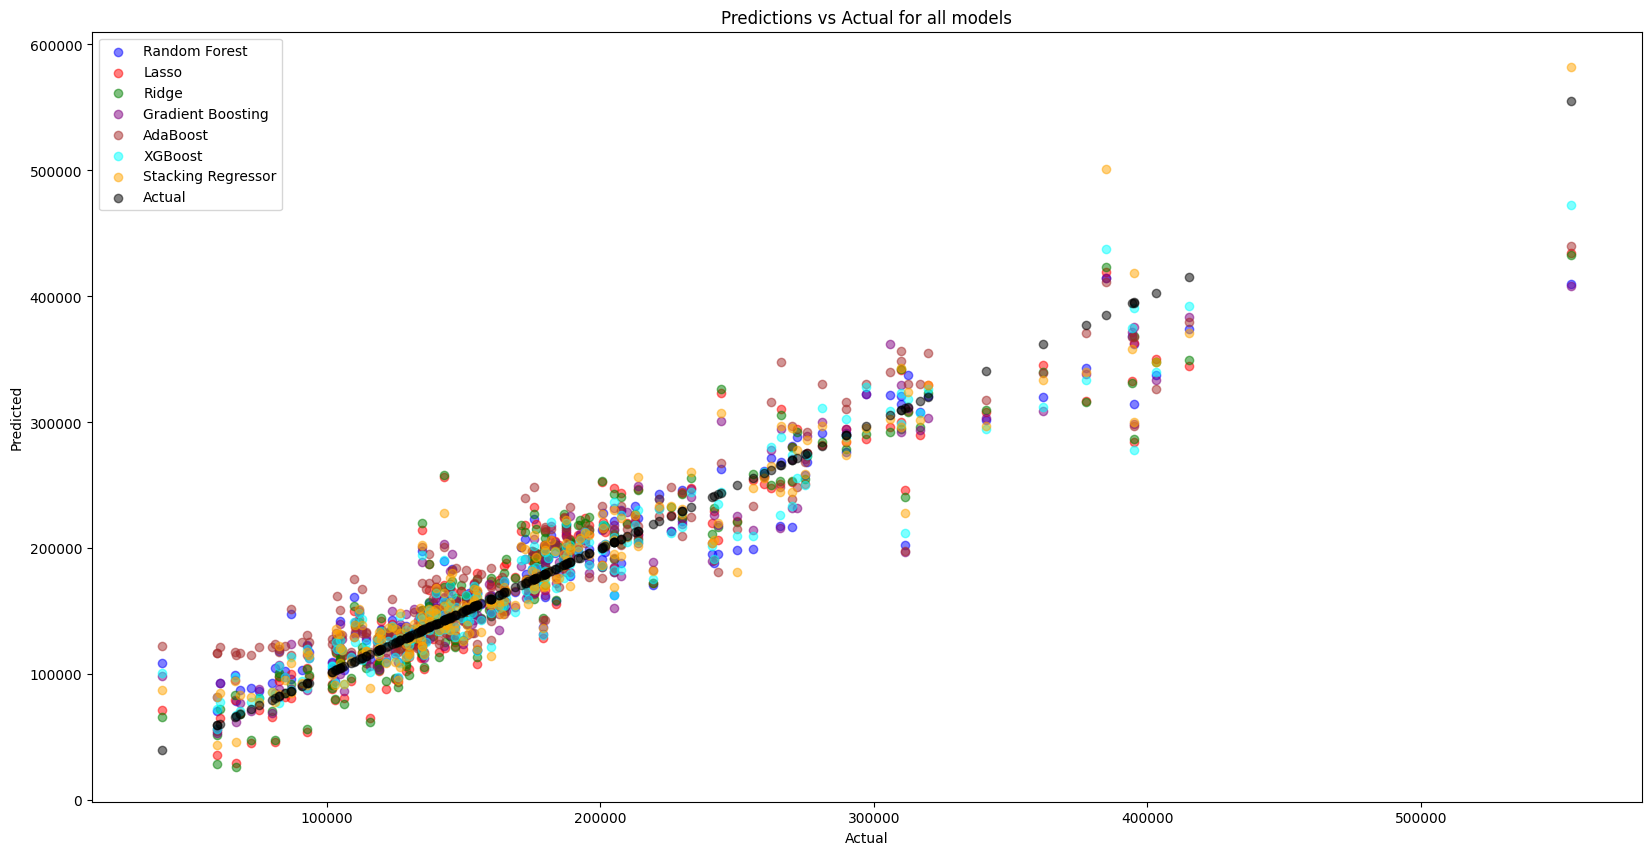

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
# Print out the results
plt.figure(figsize=(20, 10))

print(f"Random Forest MSE: {rf_mse:.2f}, RMSE: {np.sqrt(rf_mse):.2f}, MAE: {mean_absolute_error(y_test, rf_predictions):.2f}, R2 Score: {r2_score(y_test, rf_predictions):.2f}, Best params: {rf.best_params_}")
plt.scatter(y_test, rf_predictions, color='blue', label='Random Forest', alpha=0.5)

print(f"Linear Regression MSE: {lr_mse:.2f}, RMSE: {np.sqrt(lr_mse):.2f}, MAE: {mean_absolute_error(y_test, lr_predictions):.2f}, R2 Score: {r2_score(y_test, lr_predictions):.2f}, Best params: {lr.best_params_}")
plt.scatter(y_test, lr_predictions, color='red', label='Linear Regression', alpha=0.5)

print(f"XGBoost MSE: {xgboost_mse:.2f}, RMSE: {np.sqrt(xgboost_mse):.2f}, MAE: {mean_absolute_error(y_test, xgboost_predictions):.2f}, R2 Score: {r2_score(y_test, xgboost_predictions):.2f}, Best params: {xgboost.best_params_}")
plt.scatter(y_test, xgboost_predictions, color='purple', label='XGBoost', alpha=0.5)

print(f"Stacking Regressor MSE: {stacking_mse:.2f}, RMSE: {np.sqrt(stacking_mse):.2f}, MAE: {mean_absolute_error(y_test, stacking_predictions):.2f}, R2 Score: {r2_score(y_test, stacking_predictions):.2f}")
plt.scatter(y_test, stacking_predictions, color='orange', label='Stacking Regressor', alpha=0.5)

plt.scatter(y_test, y_test, color='black', label='Actual', alpha=0.5)  # Scatter plot for y_test

plt.xlabel("Actual")  # Set the x-axis label
plt.ylabel("Predicted")  # Set the y-axis label
plt.legend()  # Show a legend with the labels for each plot
plt.title("Predictions vs Actual for all models")  # Set the plot title
plt.show()  # Display all the plots

In [ ]:
from google.colab import files


# Make predictions for each model
rf_predictions = rf.predict(dfTest)
lasso_predictions = lasso.predict(dfTest)
ridge_predictions = ridge.predict(dfTest)
gbr_predictions = gbr.predict(dfTest)
ada_predictions = ada.predict(dfTest)
xgboost_predictions = xgboost.predict(dfTest)
stacking_predictions = stacking.predict(dfTest)

# Save Id column
df = pd.read_csv(folder_path + 'test.csv')
id_column = df['Id']

# Create prediction dataframes
rf_df = pd.DataFrame({'Id': id_column, 'SalePrice': rf_predictions})
lasso_df = pd.DataFrame({'Id': id_column, 'SalePrice': lasso_predictions})
ridge_df = pd.DataFrame({'Id': id_column, 'SalePrice': ridge_predictions})
gbr_df = pd.DataFrame({'Id': id_column, 'SalePrice': gbr_predictions})
ada_df = pd.DataFrame({'Id': id_column, 'SalePrice': ada_predictions})
xgboost_df = pd.DataFrame({'Id': id_column, 'SalePrice': xgboost_predictions})
stacking_df = pd.DataFrame({'Id': id_column, 'SalePrice': stacking_predictions})

# Save prediction dataframes to CSV files
rf_df.to_csv('rf_predictions.csv', index=False)
lasso_df.to_csv('lasso_predictions.csv', index=False)
ridge_df.to_csv('ridge_predictions.csv', index=False)
gbr_df.to_csv('gbr_predictions.csv', index=False)
ada_df.to_csv('ada_predictions.csv', index=False)
xgboost_df.to_csv('xgboost_predictions.csv', index=False)
stacking_df.to_csv('stacking_predictions.csv', index=False)

# Download the CSV files
files.download('rf_predictions.csv')
files.download('lasso_predictions.csv')
files.download('ridge_predictions.csv')
files.download('gbr_predictions.csv')
files.download('ada_predictions.csv')
files.download('xgboost_predictions.csv')
files.download('stacking_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##setup 2 using boost models + stacking+ baysein

In [ ]:
!pip install catboost
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


In [ ]:
# XGBoost
xgboost_params ={
    'xgbregressor__n_estimators': (10, 200),
    'xgbregressor__max_depth': (3, 10),
    'xgbregressor__learning_rate': (0.01, 0.5, 'uniform'),
    #'xgbregressor__gamma': (0, 0.5, 'uniform'),
    #'xgbregressor__reg_lambda': (0.1, 1.0, 'uniform'),
    #'xgbregressor__reg_alpha': (0.1, 1.0, 'uniform'),
    #'xgbregressor__subsample': (0.5, 1.0, 'uniform'),
    #'xgbregressor__colsample_bytree': (0.5, 1.0, 'uniform')
    }
xgboost = make_pipeline_fn(xgb.XGBRegressor(objective='reg:squarederror'), xgboost_params)
xgboost.fit(X_train, y_train)
xgboost_predictions = xgboost.predict(X_test)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
report(xgboost.cv_results_)

# LightGBM
lgbm_params = {
    'lgbmregressor__n_estimators': (10, 200),
    'lgbmregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'lgbmregressor__num_leaves': (31, 200),
    #'lgbmregressor__subsample': (0.5, 1.0, 'uniform'),
    #'lgbmregressor__max_depth': (3, 10)
    }
lgbm = make_pipeline_fn(lgb.LGBMRegressor(), lgbm_params)
lgbm.fit(X_train, y_train)
lgbm_predictions = lgbm.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
report(lgbm.cv_results_)

# CatBoost
catboost_params ={
    'catboostregressor__iterations': (10, 200),
    'catboostregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'catboostregressor__depth': (3, 10),
    #'catboostregressor__l2_leaf_reg': (1, 10),
    #'catboostregressor__bagging_temperature': (0, 1.0, 'uniform')
    }
catboost = make_pipeline_fn(CatBoostRegressor(verbose=0), catboost_params)
catboost.fit(X_train, y_train)
catboost_predictions = catboost.predict(X_test)
catboost_mse = mean_squared_error(y_test, catboost_predictions)
report(catboost.cv_results_)

# StackingRegressor
estimators = [('xgboost', xgboost.best_estimator_),
              ('lgbm', lgbm.best_estimator_),
              ('catboost', catboost.best_estimator_)]
stacking = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
stacking.fit(X_train, y_train)
stacking_predictions = stacking.predict(X_test)
stacking_mse = mean_squared_error(y_test, stacking_predictions)
report(stacking.cv_results_)


In [ ]:
# XGBoost
xgboost_params ={
    'xgbregressor__n_estimators': (10, 200),
    'xgbregressor__max_depth': (3, 10),
    'xgbregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'xgbregressor__gamma': (0, 0.5, 'uniform'),
    'xgbregressor__reg_lambda': (0.1, 1.0, 'uniform'),
    'xgbregressor__reg_alpha': (0.1, 1.0, 'uniform'),
    'xgbregressor__subsample': (0.5, 1.0, 'uniform'),
    'xgbregressor__colsample_bytree': (0.5, 1.0, 'uniform')
    }
xgboost = make_pipeline_fn(xgb.XGBRegressor(objective='reg:squarederror'), xgboost_params)
xgboost.fit(X_train, y_train)
xgboost_predictions = xgboost.predict(X_test)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
report(xgboost.cv_results_)

# LightGBM
lgbm_params = {
    'lgbmregressor__n_estimators': (10, 200),
    'lgbmregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'lgbmregressor__num_leaves': (31, 200),
    'lgbmregressor__subsample': (0.5, 1.0, 'uniform'),
    'lgbmregressor__max_depth': (3, 10)
    }
lgbm = make_pipeline_fn(lgb.LGBMRegressor(), lgbm_params)
lgbm.fit(X_train, y_train)
lgbm_predictions = lgbm.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
report(lgbm.cv_results_)

# CatBoost
catboost_params ={
    'catboostregressor__iterations': (10, 200),
    'catboostregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'catboostregressor__depth': (3, 10),
    'catboostregressor__l2_leaf_reg': (1, 10),
    'catboostregressor__bagging_temperature': (0, 1.0, 'uniform')
    }
catboost = make_pipeline_fn(CatBoostRegressor(verbose=0), catboost_params)
catboost.fit(X_train, y_train)
catboost_predictions = catboost.predict(X_test)
catboost_mse = mean_squared_error(y_test, catboost_predictions)
report(catboost.cv_results_)

# StackingRegressor
estimators = [('xgboost', xgboost.best_estimator_),
              ('lgbm', lgbm.best_estimator_),
              ('catboost', catboost.best_estimator_)]
stacking_regressor = StackingRegressor(estimators=estimators,
                                        final_estimator=RandomForestRegressor(n_estimators=10,
                                                                              random_state=42))
stacking_regressor.fit(X_train,y_train)
stacking_regressor_predictions = stacking_regressor.predict(X_test)
stacking_regressor_mse = mean_squared_error(y_test,
                                            stacking_regressor_predictions)


##params stack

### boosted models+ stacking

In [ ]:
# XGBoost
xgboost_params ={
    'xgbregressor__n_estimators': (10, 200),
    'xgbregressor__max_depth': (3, 10),
    'xgbregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'xgbregressor__gamma': (0, 0.5, 'uniform'),
    'xgbregressor__reg_lambda': (0.1, 1.0, 'uniform'),
    'xgbregressor__reg_alpha': (0.1, 1.0, 'uniform'),
    'xgbregressor__subsample': (0.5, 1.0, 'uniform'),
    'xgbregressor__colsample_bytree': (0.5, 1.0, 'uniform')
    }
xgboost = make_pipeline_fn(xgb.XGBRegressor(objective='reg:squarederror'), xgboost_params)
xgboost.fit(X_train, y_train)
xgboost_predictions = xgboost.predict(X_test)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
report(xgboost.cv_results_)

# LightGBM
lgbm_params = {
    'lgbmregressor__n_estimators': (10, 200),
    'lgbmregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'lgbmregressor__num_leaves': (31, 200),
    'lgbmregressor__subsample': (0.5, 1.0, 'uniform'),
    'lgbmregressor__max_depth': (3, 10)
    }
lgbm = make_pipeline_fn(lgb.LGBMRegressor(), lgbm_params)
lgbm.fit(X_train, y_train)
lgbm_predictions = lgbm.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
report(lgbm.cv_results_)

# CatBoost
catboost_params ={
    'catboostregressor__iterations': (10, 200),
    'catboostregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'catboostregressor__depth': (3, 10),
    'catboostregressor__l2_leaf_reg': (1, 10),
    'catboostregressor__bagging_temperature': (0, 1.0, 'uniform')
    }
catboost = make_pipeline_fn(CatBoostRegressor(verbose=0), catboost_params)
catboost.fit(X_train, y_train)
catboost_predictions = catboost.predict(X_test)
catboost_mse = mean_squared_error(y_test, catboost_predictions)
report(catboost.cv_results_)

# StackingRegressor
estimators = [('xgboost', xgboost.best_estimator_),
              ('lgbm', lgbm.best_estimator_),
              ('catboost', catboost.best_estimator_)]
stacking_regressor = StackingRegressor(estimators=estimators,
                                        final_estimator=RandomForestRegressor(n_estimators=10,
                                                                              random_state=42))
stacking_regressor.fit(X_train,y_train)
stacking_regressor_predictions = stacking_regressor.predict(X_test)
stacking_regressor_mse = mean_squared_error(y_test,
                                            stacking_regressor_predictions)





### regression

In [ ]:
# Regression models
# Linear Regression
linear_regression_params = {
    'linearregression__fit_intercept': [True, False],
    'linearregression__normalize': [True, False]
}
linear_regression = make_pipeline_fn(LinearRegression(), linear_regression_params)
linear_regression.fit(X_train, y_train)
linear_regression_predictions = linear_regression.predict(X_test)
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
report(linear_regression.cv_results_)

# Ridge Regression
ridge_params = {
    'ridgeregressor__alpha': (0.1, 1.0, 'uniform'),
    'ridgeregressor__fit_intercept': [True, False],
    'ridgeregressor__normalize': [True, False]
}
ridge = make_pipeline_fn(Ridge(), ridge_params)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
report(ridge.cv_results_)

# Lasso Regression
lasso_params = {
    'lassoregressor__alpha': (0.1, 1.0, 'uniform'),
    'lassoregressor__fit_intercept': [True, False],
    'lassoregressor__normalize': [True, False]
}
lasso = make_pipeline_fn(Lasso(), lasso_params)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
report(lasso.cv_results_)

# ElasticNet Regression
elasticnet_params = {
    'elasticnet__alpha': (0.1, 1.0, 'uniform'),
    'elasticnet__l1_ratio': (0.1, 1.0),
    'elasticnet__fit_intercept': [True, False],
    'elasticnet__normalize': [True, False]
}
elasticnet = make_pipeline_fn(ElasticNet(), elasticnet_params)
elasticnet.fit(X_train, y_train)
elasticnet_predictions = elasticnet.predict(X_test)
elasticnet_mse = mean_squared_error(y_test, elasticnet_predictions)
report(elasticnet.cv_results_)

# Random Forest Regression
random_forest_params ={
    'randomforestregressor__n_estimators': (10, 200),
    'randomforestregressor__max_depth': (3, 10),
    #'randomforestregressor__min_samples_split': (2, 10),
    #'randomforestregressor__min_samples_leaf': (1, 10),
    #'randomforestregressor__max_features': ('auto', 'sqrt', 'log2')
}
random_forest = make_pipeline_fn(RandomForestRegressor(random_state=42), random_forest_params)
random_forest.fit(X_train,y_train)
random_forest_predictions = random_forest.predict(X_test)
random_forest_mse = mean_squared_error(y_test,
                                       random_forest_predictions)
report(random_forest.cv_results_)



### classification models


In [ ]:
# Classification models
# Logistic Regression
logistic_regression_params ={
    'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none'],
    #'logisticregression__C':[0.01, 0.1, 1.0],
    #'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #'logisticregression__max_iter':[1000]
}
logistic_regression = make_pipeline_fn(LogisticRegression(random_state=42), logistic_regression_params)
logistic_regression.fit(X_train,y_train)
logistic_regression_predictions = logistic_regression.predict(X_test)
logistic_regression_accuracy_score = accuracy_score(y_test,
                                                    logistic_regression_predictions)
report(logistic_regression.cv_results_)

# Decision Tree Classifier
decision_tree_params ={
    #'decisiontreeclassifier__criterion':['gini', 'entropy'],
    #'decisiontreeclassifier__splitter':['best', 'random'],
    #'decisiontreeclassifier__max_depth':[3,None],
    #'decisiontreeclassifier__min_samples_split':[2],
    #'decisiontreeclassifier__min_samples_leaf':[1],
}
decision_tree = make_pipeline_fn(DecisionTreeClassifier(random_state=42), decision_tree_params)
decision_tree.fit(X_train,y_train)
decision_tree_predictions = decision_tree.predict(X_test)
decision_tree_accuracy_score = accuracy_score(y_test,
                                              decision_tree_predictions)
report(decision_tree.cv_results_)

# Random Forest Classifier
random_forest_params ={
    'randomforestclassifier__n_estimators': (10, 200),
    'randomforestclassifier__max_depth': (3, 10),
    #'randomforestclassifier__min_samples_split': (2, 10),
    #'randomforestclassifier__min_samples_leaf': (1, 10),
    #'randomforestclassifier__max_features': ('auto', 'sqrt', 'log2')
}
random_forest = make_pipeline_fn(RandomForestClassifier(random_state=42), random_forest_params)
random_forest.fit(X_train,y_train)
random_forest_predictions = random_forest.predict(X_test)
random_forest_accuracy_score = accuracy_score(y_test,
                                               random_forest_predictions)
report(random_forest.cv_results_)

# K-Nearest Neighbors Classifier
knn_params ={
    'kneighborsclassifier__n_neighbors': [3,5,7],
    'kneighborsclassifier__weights': ['uniform','distance'],
    'kneighborsclassifier__algorithm': ['auto','ball_tree','kd_tree','brute']
}
knn = make_pipeline_fn(KNeighborsClassifier(), knn_params)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy_score = accuracy_score(y_test,
                                     knn_predictions)
report(knn.cv_results_)

# Support Vector Machine Classifier
svm_params ={
    'svc__C': [0.1, 1.0, 10.0],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    #'svc__degree': [2,3,4],
    #'svc__gamma': ['scale','auto']
}
svm = make_pipeline_fn(SVC(random_state=42), svm_params)
svm.fit(X_train,y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy_score = accuracy_score(y_test,
                                     svm_predictions)
report(svm.cv_results_)


# MODELS ONE BY ONE

##LGBM

In [ ]:
# necessary imports for LightGBM
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# setting parameters
lgbm_params = {
    'lgbmregressor__n_estimators': (10, 200),
    'lgbmregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'lgbmregressor__num_leaves': (31, 200),
    'lgbmregressor__subsample': (0.5, 1.0, 'uniform'),
    'lgbmregressor__max_depth': (3, 10)
}

# create and fit model
lgbm = make_pipeline_fn(LGBMRegressor(), lgbm_params, n_iter=5)
lgbm.fit(X_train, y_train)

# model report
report(lgbm.cv_results_)

# prediction and evaluation
lgbm_predictions = lgbm.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)

# plotting
plt.figure(figsize=(20, 10))
print(f"LightGBM MSE: {lgbm_mse:.2f}, RMSE: {np.sqrt(lgbm_mse):.2f}, MAE: {mean_absolute_error(y_test, lgbm_predictions):.2f}, R2 Score: {r2_score(y_test, lgbm_predictions):.2f}, Best params: {lgbm.best_params_}")
plt.scatter(y_test, lgbm_predictions, color='blue', label='LightGBM', alpha=0.5)
plt.scatter(y_test, y_test, color='black', label='Actual', alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Predictions vs Actual for LightGBM model")
plt.show()

# downloading prediction results
df = pd.read_csv(folder_path + 'test.csv')
id_column = df['id']
lgbm_predictions = lgbm.predict(dfTest)
lgbm_df = pd.DataFrame({'id': id_column, 'sales': lgbm_predictions})
lgbm_df.to_csv('lgbm_predictions.csv', index=False)
files.download('lgbm_predictions.csv')


##XGBOOST

In [ ]:
# necessary imports for XGBoost
from xgboost import XGBRegressor

# setting parameters
xgboost_params = {
    'xgbregressor__n_estimators': (10, 200),
    'xgbregressor__max_depth': (3, 10),
    'xgbregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'xgbregressor__gamma': (0, 0.5, 'uniform'),
    'xgbregressor__reg_lambda': (0.1, 1.0, 'uniform'),
    'xgbregressor__reg_alpha': (0.1, 1.0, 'uniform'),
    'xgbregressor__subsample': (0.5, 1.0, 'uniform'),
    'xgbregressor__colsample_bytree': (0.5, 1.0, 'uniform')
}

# create and fit model
xgboost = make_pipeline_fn(XGBRegressor(objective='reg:squarederror'), xgboost_params, n_iter=5)
xgboost.fit(X_train, y_train)

# model report
report(xgboost.cv_results_)
# existing code

# prediction and evaluation
xgboost_predictions = xgboost.predict(dfTest)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)

# plotting
plt.figure(figsize=(20, 10))
print(f"XGBoost MSE: {xgboost_mse:.2f}, RMSE: {np.sqrt(xgboost_mse):.2f}, MAE: {mean_absolute_error(y_test, xgboost_predictions):.2f}, R2 Score: {r2_score(y_test, xgboost_predictions):.2f}, Best params: {xgboost.best_params_}")
plt.scatter(y_test, xgboost_predictions, color='blue', label='XGBoost', alpha=0.5)
plt.scatter(y_test, y_test, color='black', label='Actual', alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Predictions vs Actual for XGBoost model")
plt.show()

# existing code

# downloading prediction results
xgboost_df = pd.DataFrame({'Id': id_column, 'sales': xgboost_predictions})
xgboost_df.to_csv('xgboost_predictions.csv', index=False)
files.download('xgboost_predictions.csv')


##RANDOMFOREST

In [ ]:
# necessary imports for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# setting parameters
rf_params = {
    'randomforestregressor__n_estimators': (10, 200),
    'randomforestregressor__max_depth': (3, 10),
    'randomforestregressor__min_samples_split': (2, 5),
    'randomforestregressor__min_samples_leaf': (1, 5),
}

# create and fit model
rf = make_pipeline_fn(RandomForestRegressor(), rf_params, n_iter=5)
rf.fit(X_train, y_train)

# model report
report(rf.cv_results_)

# prediction and evaluation
rf_predictions = rf.predict(dfTest)
rf_mse = mean_squared_error(y_test, rf_predictions)
# existing code


# plotting
plt.figure(figsize=(20, 10))
print(f"RandomForestRegressor MSE: {rf_mse:.2f}, RMSE: {np.sqrt(rf_mse):.2f}, MAE: {mean_absolute_error(y_test, rf_predictions):.2f}, R2 Score: {r2_score(y_test, rf_predictions):.2f}, Best params: {rf.best_params_}")
plt.scatter(y_test, rf_predictions, color='blue', label='RandomForest', alpha=0.5)
plt.scatter(y_test, y_test, color='black', label='Actual', alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Predictions vs Actual for RandomForestRegressor model")
plt.show()

# existing code

# downloading prediction results
rf_df = pd.DataFrame({'Id': id_column, 'sales': rf_predictions})
rf_df.to_csv('rf_predictions.csv', index=False)
files.download('rf_predictions.csv')


##sdg regressor

In [ ]:
# necessary imports for SGDRegressor
from sklearn.linear_model import SGDRegressor

# setting parameters
sgd_params = {
    'sgdregressor__max_iter': (500, 1000),
    'sgdregressor__tol': (1e-3, 1e-1, 'uniform'),
    'sgdregressor__penalty': ['l2', 'l1', 'elasticnet'],
}

# create and fit model
sgd = make_pipeline_fn(SGDRegressor(), sgd_params, n_iter=5)
sgd.fit(X_train, y_train)

# model report
report(sgd.cv_results_)

# prediction and evaluation
sgd_predictions = sgd.predict(dfTest)
sgd_mse = mean_squared_error(y_test, sgd_predictions)
# existing code


# plotting
plt.figure(figsize=(20, 10))
print(f"SGDRegressor MSE: {sgd_mse:.2f}, RMSE: {np.sqrt(sgd_mse):.2f}, MAE: {mean_absolute_error(y_test, sgd_predictions):.2f}, R2 Score: {r2_score(y_test, sgd_predictions):.2f}, Best params: {sgd.best_params_}")
plt.scatter(y_test, sgd_predictions, color='blue', label='SGD', alpha=0.5)
plt.scatter(y_test, y_test, color='black', label='Actual', alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Predictions vs Actual for SGDRegressor model")
plt.show()

# existing code

# downloading prediction results
sgd_df = pd.DataFrame({'Id': id_column, 'sales': sgd_predictions})
sgd_df.to_csv('sgd_predictions.csv', index=False)
files.download('sgd_predictions.csv')


#download the predictions


In [ ]:
# Load Id column from the original test dataset
df  = pd.read_csv(folder_path + 'test.csv')
id_column = df['Id']

# Make predictions for each model
xgboost_predictions = xgboost.predict(dfTest)
lgbm_predictions = lgbm.predict(dfTest)
catboost_predictions = catboost.predict(dfTest)
stacking_predictions = stacking.predict(dfTest)

# Create prediction dataframes
xgboost_df = pd.DataFrame({'Id': id_column, 'SalePrice': xgboost_predictions})
lgbm_df = pd.DataFrame({'Id': id_column, 'SalePrice': lgbm_predictions})
catboost_df = pd.DataFrame({'Id': id_column, 'SalePrice': catboost_predictions})
stacking_df = pd.DataFrame({'Id': id_column, 'SalePrice': stacking_predictions})

# Save prediction dataframes to CSV files
xgboost_df.to_csv('xgboost_predictions.csv', index=False)
lgbm_df.to_csv('lgbm_predictions.csv', index=False)
catboost_df.to_csv('catboost_predictions.csv', index=False)
stacking_df.to_csv('stacking_predictions.csv', index=False)

# Download the CSV files
files.download('xgboost_predictions.csv')
files.download('lgbm_predictions.csv')
files.download('catboost_predictions.csv')
files.download('stacking_predictions.csv')


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
# Print out the results
plt.figure(figsize=(20, 10))


print(f"XGBoost MSE: {xgboost_mse:.2f}, RMSE: {np.sqrt(xgboost_mse):.2f}, MAE: {mean_absolute_error(y_test, xgboost_predictions):.2f}, R2 Score: {r2_score(y_test, xgboost_predictions):.2f}, Best params: {xgboost.best_params_}")
plt.scatter(y_test, xgboost_predictions, color='cyan', label='XGBoost', alpha=0.5)

# LightGBM Results
print(f"LightGBM MSE: {lgbm_mse:.2f}, RMSE: {np.sqrt(lgbm_mse):.2f}, MAE: {mean_absolute_error(y_test, lgbm_predictions):.2f}, R2 Score: {r2_score(y_test, lgbm_predictions):.2f}, Best params: {lgbm.best_params_}")
plt.scatter(y_test, lgbm_predictions, color='blue', label='LightGBM', alpha=0.5)

# CatBoost Results
print(f"CatBoost MSE: {catboost_mse:.2f}, RMSE: {np.sqrt(catboost_mse):.2f}, MAE: {mean_absolute_error(y_test, catboost_predictions):.2f}, R2 Score: {r2_score(y_test, catboost_predictions):.2f}, Best params: {catboost.best_params_}")
plt.scatter(y_test, catboost_predictions, color='magenta', label='CatBoost', alpha=0.5)

# Stacking Regressor Results
print(f"Stacking Regressor MSE: {stacking_mse:.2f}, RMSE: {np.sqrt(stacking_mse):.2f}, MAE: {mean_absolute_error(y_test, stacking_predictions):.2f}, R2 Score: {r2_score(y_test, stacking_predictions):.2f}")
plt.scatter(y_test, stacking_predictions, color='orange', label='Stacking Regressor', alpha=0.5)



plt.scatter(y_test, y_test, color='black', label='Actual', alpha=0.5)  # Scatter plot for y_test

plt.xlabel("Actual")  # Set the x-axis label
plt.ylabel("Predicted")  # Set the y-axis label
plt.legend()  # Show a legend with the labels for each plot
plt.title("Predictions vs Actual for all models")  # Set the plot title
plt.show()  # Display all the plots
# Load Id column from the original test dataset
df  = pd.read_csv(folder_path + 'test.csv')
id_column = df['Id']

# Make predictions for each model
xgboost_predictions = xgboost.predict(dfTest)
lgbm_predictions = lgbm.predict(dfTest)
catboost_predictions = catboost.predict(dfTest)
stacking_predictions = stacking.predict(dfTest)

# Create prediction dataframes
xgboost_df = pd.DataFrame({'Id': id_column, 'SalePrice': xgboost_predictions})
lgbm_df = pd.DataFrame({'Id': id_column, 'SalePrice': lgbm_predictions})
catboost_df = pd.DataFrame({'Id': id_column, 'SalePrice': catboost_predictions})
stacking_df = pd.DataFrame({'Id': id_column, 'SalePrice': stacking_predictions})

# Save prediction dataframes to CSV files
xgboost_df.to_csv('xgboost_predictions.csv', index=False)
lgbm_df.to_csv('lgbm_predictions.csv', index=False)
catboost_df.to_csv('catboost_predictions.csv', index=False)
stacking_df.to_csv('stacking_predictions.csv', index=False)

# Download the CSV files
files.download('xgboost_predictions.csv')
files.download('lgbm_predictions.csv')
files.download('catboost_predictions.csv')
files.download('stacking_predictions.csv')



In [ ]:
from google.colab import files

# Load Id column from the original test dataset
df  = pd.read_csv(folder_path + 'test.csv')
id_column = df['Id']

# Make predictions
dfTest_predictions_rf = rf.predict(dfTest)
dfTest_predictions_lr = lr.predict(dfTest)
dfTest_predictions_xgboost = xgboost.predict(dfTest)
dfTest_predictions_stacking = stacking.predict(dfTest)

# Create dataframes for each model's predictions, including 'Id' column
rf_df = pd.DataFrame({'Id': id_column, 'SalePrice': dfTest_predictions_rf})
lr_df = pd.DataFrame({'Id': id_column, 'SalePrice': dfTest_predictions_lr})
xgboost_df = pd.DataFrame({'Id': id_column, 'SalePrice': dfTest_predictions_xgboost})
stacking_df = pd.DataFrame({'Id': id_column, 'SalePrice': dfTest_predictions_stacking})

# Save predictions dataframes to CSV files
rf_df.to_csv('rf_predictions.csv', index=False)
lr_df.to_csv('lr_predictions.csv', index=False)
xgboost_df.to_csv('xgboost_predictions.csv', index=False)
stacking_df.to_csv('stacking_predictions.csv', index=False)

# Download the CSV files
files.download('rf_predictions.csv')
files.download('lr_predictions.csv')
files.download('xgboost_predictions.csv')
files.download('stacking_predictions.csv')
